In [1]:
import datetime
import math
import pandas as pd
import random 
import radar
import numpy as np
import calendar
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/data/declaraciones.csv", sep="|",encoding="utf-8")
df.head()

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (6,11,23,24,36,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SISTEMA               LLAVE_MGR TIPO_DECLARACION  REGIMEN  REFERENCIA  \
0       18  319284@2019@09@1@35372              FAC  1000000  1900183594   
1       18  319284@2019@09@1@35372              FAC  1000000  1900183594   
2       18  319284@2019@09@1@35372              FAC  1000000  1900183594   
3       18  319284@2019@09@1@35372              FAC  1000000  1900183594   
4       18  319284@2019@09@1@35372              FAC  1000000  1900183594   

   INCISO_EXT   CONTRIBUYENTE DECLARANTE  PESO_NETO    INCISO  ...  \
0           0  06141501850054        002     614.08  73142000  ...   
1           0  06141501850054        002     909.46  72166100  ...   
2           0  06141501850054        002    1563.87  73069000  ...   
3           0  06141501850054        002     647.79  72166100  ...   
4           0  06141501850054        002       0.09  72155000  ...   

  PAIS_EXPORTACION PAIS_PROCEDENCIA  ROJO SEGURO  SELECTIVIDAD  \
0               SV               SV   0.0  21.15           0.0   
1               SV               SV   0.0  21.15           0.0   
2               SV               SV   0.0  21.15           0.0   
3               SV               SV   0.0  21.15           0.0   
4               SV               SV   0.0  21.15           0.0   

  TIPO_CONTRIBUYENTE_NRC TOTAL_BULTOS TOTAL_ITEMS  TOTAL_PESO_NETO  VERDE  
0                      J         37.0         8.0         10293.77    1.0  
1                      J         37.0         8.0         10293.77    1.0  
2                      J         37.0         8.0         10293.77    1.0  
3                      J         37.0         8.0         10293.77    1.0  
4                      J         37.0         8.0         10293.77    1.0  

[5 rows x 55 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411038 entries, 0 to 1411037
Data columns (total 55 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SISTEMA                 1411038 non-null  int64  
 1   LLAVE_MGR               1411038 non-null  object 
 2   TIPO_DECLARACION        1411038 non-null  object 
 3   REGIMEN                 1411038 non-null  int64  
 4   REFERENCIA              1411038 non-null  object 
 5   INCISO_EXT              1411038 non-null  int64  
 6   CONTRIBUYENTE           1411038 non-null  object 
 7   DECLARANTE              1411038 non-null  object 
 8   PESO_NETO               1296815 non-null  float64
 9   INCISO                  1411038 non-null  int64  
 10  DESC_COMERCIAL          1310265 non-null  object 
 11  ADUANA                  1410902 non-null  object 
 12  ANNO                    1410899 non-null  float64
 13  FECHA_SELECTIVIDAD_IDX  1410899 non-null  object 
 14  CU

In [7]:
df.shape

(1411038, 55)

In [5]:
df.columns

Index(['SISTEMA', 'LLAVE_MGR', 'TIPO_DECLARACION', 'REGIMEN', 'REFERENCIA',
       'INCISO_EXT', 'CONTRIBUYENTE', 'DECLARANTE', 'PESO_NETO', 'INCISO',
       'DESC_COMERCIAL', 'ADUANA', 'ANNO', 'FECHA_SELECTIVIDAD_IDX', 'CUANTIA',
       'TIPO_OPERACION', 'PAIS_ORIGEN', 'FECHA_REGISTRO_IDX', 'PESO_BRUTO',
       'ITEM', 'TIPO_EMBALAJE', 'CAPITULO', 'ADUANA_INGRESO', 'ALMACEN',
       'AMARILLO', 'BANDERA_CNI', 'CIF', 'CIF_ESTADISTICO', 'COSTOS', 'DAI',
       'DEDUCCIONES', 'ESTADO_DECLARACION', 'EXPORTADOR', 'FLETE',
       'FLETE_EXTERNO', 'FLETE_INTERNO', 'FOB', 'IMPUESTOS', 'IVA', 'LST_OPE',
       'MGR_PRONOSTICO', 'MODALIDAD_PAGO', 'NUMERO_LIQ', 'OTROS_GASTOS',
       'PAIS_DESTINO', 'PAIS_EXPORTACION', 'PAIS_PROCEDENCIA', 'ROJO',
       'SEGURO', 'SELECTIVIDAD', 'TIPO_CONTRIBUYENTE_NRC', 'TOTAL_BULTOS',
       'TOTAL_ITEMS', 'TOTAL_PESO_NETO', 'VERDE'],
      dtype='object')

In [6]:
df.describe()

SISTEMA       REGIMEN    INCISO_EXT     PESO_NETO        INCISO  \
count  1.411038e+06  1.411038e+06  1.411038e+06  1.296815e+06  1.411038e+06   
mean   9.461350e+00  3.670158e+06  2.576605e+00  3.241227e+03  5.572638e+07   
std    8.499915e+00  1.171418e+06  4.352200e+01  1.025849e+05  2.815822e+07   
min    1.000000e+00  1.000000e+06  0.000000e+00 -1.107060e+03  1.012100e+06   
25%    1.000000e+00  3.156039e+06  0.000000e+00  3.700000e+00  3.402119e+07   
50%    1.000000e+00  4.000000e+06  0.000000e+00  6.336000e+01  6.103420e+07   
75%    1.800000e+01  4.000035e+06  0.000000e+00  7.710000e+02  8.451500e+07   
max    1.800000e+01  9.200000e+06  9.000000e+02  6.405900e+07  9.801003e+07   

               ANNO       CUANTIA    PESO_BRUTO          ITEM      CAPITULO  \
count  1.410899e+06  1.410388e+06  1.410899e+06  1.410899e+06  1.410899e+06   
mean   2.019997e+03  2.600142e+04  3.139654e+03  1.787710e+01  5.559514e+01   
std    5.485836e-02  9.341511e+06  9.888832e+04  4.191430e+01  2.812347e+01   
min    2.014000e+03  0.000000e+00  1.000000e-02  1.000000e+00  1.000000e+00   
25%    2.020000e+03  4.000000e+00  3.800000e+00  2.000000e+00  3.400000e+01   
50%    2.020000e+03  8.000000e+01  6.357000e+01  5.000000e+00  6.100000e+01   
75%    2.020000e+03  9.724800e+02  7.640000e+02  1.400000e+01  8.400000e+01   
max    2.020000e+03  8.256250e+09  6.405900e+07  6.470000e+02  9.800000e+01   

       ...           IVA  MGR_PRONOSTICO  MODALIDAD_PAGO  OTROS_GASTOS  \
count  ...  1.411038e+06    1.411038e+06    1.411038e+06  1.411038e+06   
mean   ...  1.958204e+03    3.948157e-03    3.981555e+00  8.709914e+01   
std    ...  6.001549e+03    6.271022e-02    3.546423e+00  5.045469e+02   
min    ...  0.000000e+00    0.000000e+00    1.000000e+00  0.000000e+00   
25%    ...  0.000000e+00    0.000000e+00    3.000000e+00  0.000000e+00   
50%    ...  2.239600e+02    0.000000e+00    3.000000e+00  0.000000e+00   
75%    ...  1.484930e+03    0.000000e+00    3.000000e+00  0.000000e+00   
max    ...  9.411336e+05    1.000000e+00    2.100000e+01  1.066355e+05   

               ROJO        SEGURO  TOTAL_BULTOS   TOTAL_ITEMS  \
count  1.411038e+06  1.411038e+06  1.408008e+06  1.411038e+06   
mean   4.077849e-02  1.038676e+02  5.264977e+02  3.476965e+01   
std    1.977767e-01  1.769920e+03  1.567552e+03  7.061328e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    0.000000e+00  0.000000e+00  1.000000e+01  4.000000e+00   
50%    0.000000e+00  1.702000e+01  3.800000e+01  1.000000e+01   
75%    0.000000e+00  6.547750e+01  5.340000e+02  3.000000e+01   
max    1.000000e+00  6.000000e+05  6.084000e+05  6.470000e+02   

       TOTAL_PESO_NETO         VERDE  
count     1.411037e+06  1.411038e+06  
mean      9.127876e+03  9.412128e-01  
std       2.874485e+05  2.352261e-01  
min       0.000000e+00  0.000000e+00  
25%       4.904000e+01  1.000000e+00  
50%       1.853220e+03  1.000000e+00  
75%       1.183519e+04  1.000000e+00  
max       6.405913e+07  1.000000e+00  

[8 rows x 30 columns]

In [7]:
def colorNegativeValueToRed(value):
  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'black'
  else:
    color = 'green'

  return 'color: %s' % color

In [8]:
def highlightMax(s):
    isMax = s == s.max()
    return ['background-color: orange' if v else '' for v in isMax]

def highlightMin(s):
    isMin = s == s.min()
    return ['background-color: green' if v else '' for v in isMin]

In [9]:
import seaborn as sns

cm = sns.light_palette("pink", as_cmap=True)

s = df.head().style.background_gradient(cmap=cm)
s

In [10]:
df01=df.iloc[::20, 8:10].head(10) 
df01

PESO_NETO    INCISO
0       614.08  73142000
20    22000.00   8031000
40      142.88  39203020
60     7112.40  73066100
80      544.00   8043000
100     362.00   8101000
120     110.00  98010010
140     362.88   7069000
160       3.00  98010010
180    5080.00   7020000

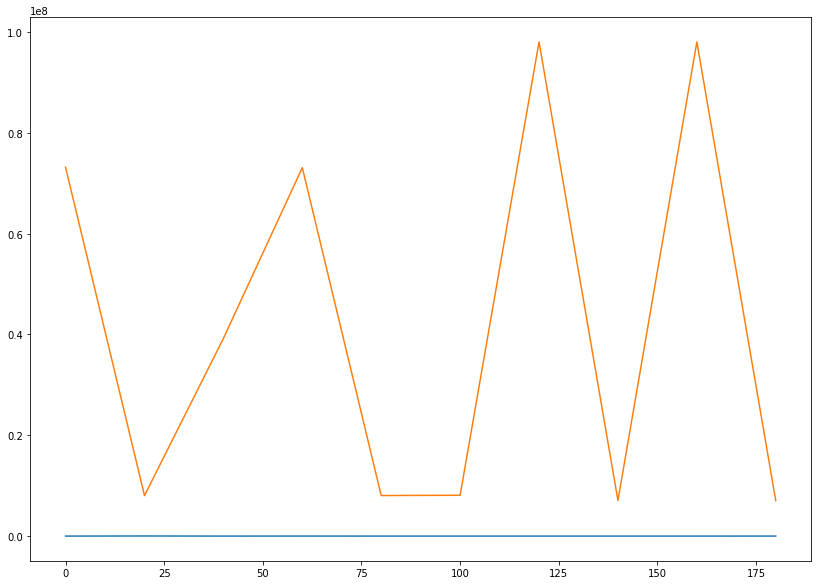

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 10)
plt.plot(df01)

In [12]:
df['AMARILLO'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AMARILLO, dtype: object

In [4]:
numerics = ['AMARILLO', 'BANDERA_CNI', 'CIF', 'CIF_ESTADISTICO', 'COSTOS',
       'CUANTIA', 'DAI', 'DEDUCCIONES', 'FLETE', 'FLETE_EXTERNO',
       'FLETE_INTERNO', 'FOB', 'IMPUESTOS', 'ITEM', 'IVA', 'OTROS_GASTOS',
       'PESO_BRUTO', 'PESO_NETO', 'ROJO', 'SEGURO', 'SELECTIVIDAD',
       'TOTAL_BULTOS', 'TOTAL_ITEMS', 'TOTAL_PESO_NETO', 'VERDE']


In [6]:
categorics = ['SISTEMA', 'LLAVE_MGR', 'EXPORTADOR','CONTRIBUYENTE', 'DECLARANTE', 'INCISO', 'INCISO_EXT','ADUANA', 'ADUANA_INGRESO',
       'PAIS_DESTINO', 'PAIS_EXPORTACION', 'PAIS_PROCEDENCIA', 'PAIS_ORIGEN', 'REGIMEN', 
       'DESC_COMERCIAL',
       'MODALIDAD_PAGO',            
       'TIPO_DECLARACION', 'REFERENCIA',
       'ANNO', 'FECHA_SELECTIVIDAD_IDX',
       'TIPO_OPERACION', 'FECHA_REGISTRO_IDX',
       'TIPO_EMBALAJE', 'CAPITULO', 'ALMACEN',
       'ESTADO_DECLARACION', 
       'LST_OPE',
       'MGR_PRONOSTICO', 'NUMERO_LIQ',
       'TIPO_CONTRIBUYENTE_NRC']

In [7]:
df02=df[numerics]
df02.head()

AMARILLO  BANDERA_CNI       CIF  CIF_ESTADISTICO  COSTOS  CUANTIA  DAI  \
0      0.0          0.0  10741.22         10741.22  459.29     16.0  0.0   
1      0.0          0.0  10741.22         10741.22  459.29    116.0  0.0   
2      0.0          0.0  10741.22         10741.22  459.29    177.0  0.0   
3      0.0          0.0  10741.22         10741.22  459.29     64.0  0.0   
4      0.0          0.0  10741.22         10741.22  459.29      3.0  0.0   

   DEDUCCIONES   FLETE  FLETE_EXTERNO  ... OTROS_GASTOS PESO_BRUTO  PESO_NETO  \
0          0.0  438.14            0.0  ...          0.0     614.08     614.08   
1          0.0  438.14            0.0  ...          0.0     909.46     909.46   
2          0.0  438.14            0.0  ...          0.0    1563.87    1563.87   
3          0.0  438.14            0.0  ...          0.0     647.79     647.79   
4          0.0  438.14            0.0  ...          0.0       0.09       0.09   

   ROJO  SEGURO  SELECTIVIDAD  TOTAL_BULTOS  TOTAL_ITEMS  TOTAL_PESO_NETO  \
0   0.0   21.15           0.0          37.0          8.0         10293.77   
1   0.0   21.15           0.0          37.0          8.0         10293.77   
2   0.0   21.15           0.0          37.0          8.0         10293.77   
3   0.0   21.15           0.0          37.0          8.0         10293.77   
4   0.0   21.15           0.0          37.0          8.0         10293.77   

   VERDE  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  

[5 rows x 25 columns]

In [8]:
df03=df[categorics]
df03.head()

SISTEMA               LLAVE_MGR                           EXPORTADOR  \
0       18  319284@2019@09@1@35372  GALVANIZADORA INDUSTRIAL SALVADOREÑ   
1       18  319284@2019@09@1@35372  GALVANIZADORA INDUSTRIAL SALVADOREÑ   
2       18  319284@2019@09@1@35372  GALVANIZADORA INDUSTRIAL SALVADOREÑ   
3       18  319284@2019@09@1@35372  GALVANIZADORA INDUSTRIAL SALVADOREÑ   
4       18  319284@2019@09@1@35372  GALVANIZADORA INDUSTRIAL SALVADOREÑ   

    CONTRIBUYENTE DECLARANTE    INCISO  INCISO_EXT ADUANA  ADUANA_INGRESO  \
0  06141501850054        002  73142000           0    9.0               9   
1  06141501850054        002  72166100           0    9.0               9   
2  06141501850054        002  73069000           0    9.0               9   
3  06141501850054        002  72166100           0    9.0               9   
4  06141501850054        002  72155000           0    9.0               9   

  PAIS_DESTINO  ... TIPO_OPERACION FECHA_REGISTRO_IDX TIPO_EMBALAJE  CAPITULO  \
0           NI  ...              E         28/12/2019            PA      73.0   
1           NI  ...              E         28/12/2019            PA      72.0   
2           NI  ...              E         28/12/2019            PA      73.0   
3           NI  ...              E         28/12/2019            PA      72.0   
4           NI  ...              E         28/12/2019            PA      72.0   

  ALMACEN  ESTADO_DECLARACION LST_OPE MGR_PRONOSTICO  NUMERO_LIQ  \
0     901                   L       U            0.0      L63514   
1     901                   L       U            0.0      L63514   
2     901                   L       U            0.0      L63514   
3     901                   L       U            0.0      L63514   
4     901                   L       U            0.0      L63514   

  TIPO_CONTRIBUYENTE_NRC  
0                      J  
1                      J  
2                      J  
3                      J  
4                      J  

[5 rows x 30 columns]

In [17]:

BANDERA_CNI	CIF	CIF_ESTADISTICO	COSTOS	CUANTIA	DAI	DEDUCCIdf02.describe()

BANDERA_CNI           CIF  CIF_ESTADISTICO        COSTOS  \
count  1.411038e+06  1.411038e+06     1.411038e+06  1.411038e+06   
mean   3.108917e-02  2.881083e+04     2.892529e+04  7.624737e+02   
std    1.735588e-01  1.320102e+05     1.321385e+05  2.666373e+03   
min    0.000000e+00  0.000000e+00     0.000000e+00 -1.500000e+04   
25%    0.000000e+00  2.229000e+03     2.230862e+03  0.000000e+00   
50%    0.000000e+00  9.462940e+03     9.482310e+03  2.239300e+02   
75%    0.000000e+00  3.635121e+04     3.646988e+04  8.360475e+02   
max    1.000000e+00  4.062528e+07     4.062528e+07  6.252800e+05   

            CUANTIA           DAI   DEDUCCIONES         FLETE  FLETE_EXTERNO  \
count  1.410388e+06  1.411037e+06  1.411038e+06  1.411038e+06   1.411038e+06   
mean   2.600142e+04  7.080963e+02  2.728869e-02  6.834762e+02   5.114612e+02   
std    9.341511e+06  2.826219e+03  1.397911e+01  1.958663e+03   1.614697e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    8.000000e+01  0.000000e+00  0.000000e+00  2.000000e+02   9.000000e+01   
75%    9.724800e+02  1.246700e+02  0.000000e+00  7.423600e+02   5.000000e+02   
max    8.256250e+09  7.015581e+05  1.500000e+04  4.303719e+05   4.303719e+05   

          IMPUESTOS  ...           IVA  OTROS_GASTOS    PESO_BRUTO  \
count  1.411038e+06  ...  1.411038e+06  1.411038e+06  1.410899e+06   
mean   2.539877e+03  ...  1.958204e+03  8.709914e+01  3.139654e+03   
std    8.641692e+03  ...  6.001549e+03  5.045469e+02  9.888832e+04   
min    0.000000e+00  ...  0.000000e+00  0.000000e+00  1.000000e-02   
25%    1.800000e+01  ...  0.000000e+00  0.000000e+00  3.800000e+00   
50%    2.664100e+02  ...  2.239600e+02  0.000000e+00  6.357000e+01   
75%    1.625320e+03  ...  1.484930e+03  0.000000e+00  7.640000e+02   
max    9.411516e+05  ...  9.411336e+05  1.066355e+05  6.405900e+07   

          PESO_NETO          ROJO        SEGURO  TOTAL_BULTOS   TOTAL_ITEMS  \
count  1.296815e+06  1.411038e+06  1.411038e+06  1.408008e+06  1.411038e+06   
mean   3.241227e+03  4.077849e-02  1.038676e+02  5.264977e+02  3.476965e+01   
std    1.025849e+05  1.977767e-01  1.769920e+03  1.567552e+03  7.061328e+01   
min   -1.107060e+03  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    3.700000e+00  0.000000e+00  0.000000e+00  1.000000e+01  4.000000e+00   
50%    6.336000e+01  0.000000e+00  1.702000e+01  3.800000e+01  1.000000e+01   
75%    7.710000e+02  0.000000e+00  6.547750e+01  5.340000e+02  3.000000e+01   
max    6.405900e+07  1.000000e+00  6.000000e+05  6.084000e+05  6.470000e+02   

       TOTAL_PESO_NETO         VERDE  
count     1.411037e+06  1.411038e+06  
mean      9.127876e+03  9.412128e-01  
std       2.874485e+05  2.352261e-01  
min       0.000000e+00  0.000000e+00  
25%       4.904000e+01  1.000000e+00  
50%       1.853220e+03  1.000000e+00  
75%       1.183519e+04  1.000000e+00  
max       6.405913e+07  1.000000e+00  

[8 rows x 21 columns]

In [18]:
s = df02.head(10).style.background_gradient(cmap=cm)
s

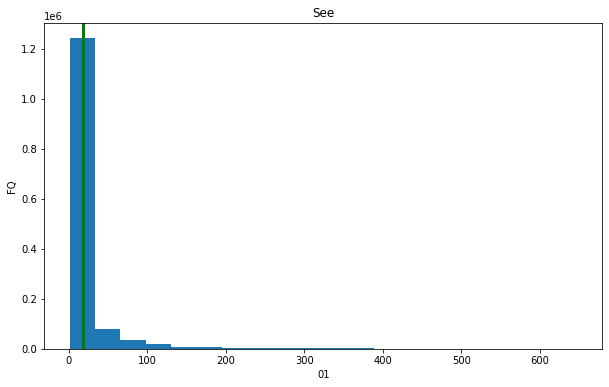

In [19]:
df02_06=df02['ITEM']
plt.figure(figsize = (10,6))
nbins = 20
n, bins, patches = plt.hist(df02_06, bins=nbins)

plt.xlabel("01")
plt.ylabel("FQ")
plt.title("See")

plt.axvline(x=df02_06.mean(), linewidth=3, color = 'g') 

plt.show()

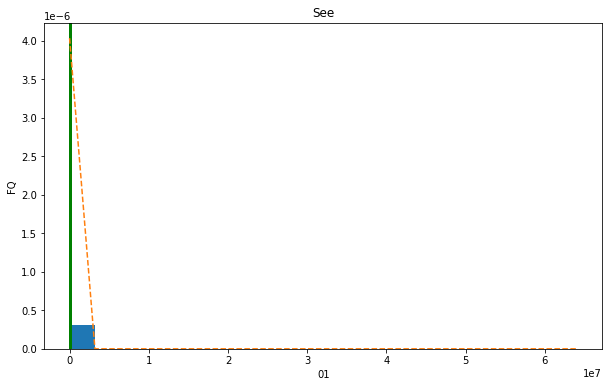

In [87]:
df02_07=df02['PESO_BRUTO']
plt.figure(figsize = (10,6))
nbins = 20
n, bins, patches = plt.hist(df02_07, bins=nbins, density=1)

plt.xlabel("01")
plt.ylabel("FQ")
plt.title("See")

plt.axvline(x=df02_07.mean(), linewidth=3, color = 'g') 

mu = df02_07.mean()
sigma = df02_07.std()

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--')

plt.show()

In [20]:
df03['EXPORTADOR']

0          GALVANIZADORA INDUSTRIAL SALVADOREÑ
1          GALVANIZADORA INDUSTRIAL SALVADOREÑ
2          GALVANIZADORA INDUSTRIAL SALVADOREÑ
3          GALVANIZADORA INDUSTRIAL SALVADOREÑ
4          GALVANIZADORA INDUSTRIAL SALVADOREÑ
                          ...                 
1411033                               85972061
1411034                               85972061
1411035                               85972061
1411036                               85972061
1411037                               85972061
Name: EXPORTADOR, Length: 1411038, dtype: object

In [21]:
df03.groupby(['EXPORTADOR']).mean()

SISTEMA        INCISO  \
EXPORTADOR                                                                 
 MONTEALEGRE , S.A. DE C.V.                           18.0  9.011130e+06   
(BOEHRINGER INGELHEIM MX.0.0                           1.0  3.004201e+07   
(CARTONAL)  WL LOGISTICAS CHIN                        18.0  7.607119e+07   
(HK) PANTOS LOGISTICS CO.                              1.0  8.428900e+07   
+GF+//BUGATTI VALVOSANITARIA//SAB S.PA.//WATERTEC     18.0  7.051253e+07   
...                                                    ...           ...   
viCENTE SCAVONE & CIA                                  1.0  3.004909e+07   
wWW.EBAY.COM                                           1.0  8.509955e+07   
xxx                                                    1.0  9.801001e+07   
xxx USA                                                1.0  8.517120e+07   
�                                                      1.0  5.249037e+07   

                                                   INCISO_EXT  ADUANA_INGRESO  \
EXPORTADOR                                                                      
 MONTEALEGRE , S.A. DE C.V.                               3.0             2.0   
(BOEHRINGER INGELHEIM MX.0.0                              0.0             3.0   
(CARTONAL)  WL LOGISTICAS CHIN                            0.0             2.0   
(HK) PANTOS LOGISTICS CO.                                 0.0             3.0   
+GF+//BUGATTI VALVOSANITARIA//SAB S.PA.//WATERTEC         0.0             2.0   
...                                                       ...             ...   
viCENTE SCAVONE & CIA                                     0.0             3.0   
wWW.EBAY.COM                                              0.0             3.0   
xxx                                                       0.0             3.0   
xxx USA                                                   0.0             3.0   
�                                                         0.0             6.0   

                                                     REGIMEN  MODALIDAD_PAGO  \
EXPORTADOR                                                                     
 MONTEALEGRE , S.A. DE C.V.                        1000000.0             4.0   
(BOEHRINGER INGELHEIM MX.0.0                       4000000.0             3.0   
(CARTONAL)  WL LOGISTICAS CHIN                     4000000.0             3.0   
(HK) PANTOS LOGISTICS CO.                          4000000.0             3.0   
+GF+//BUGATTI VALVOSANITARIA//SAB S.PA.//WATERTEC  4000000.0             3.0   
...                                                      ...             ...   
viCENTE SCAVONE & CIA                              4000000.0             3.0   
wWW.EBAY.COM                                       4000000.0             3.0   
xxx                                                4000002.0            16.0   
xxx USA                                            4000000.0            16.0   
�                                                  5200032.0             3.0   

                                                     ANNO   CAPITULO  \
EXPORTADOR                                                             
 MONTEALEGRE , S.A. DE C.V.                        2020.0   9.000000   
(BOEHRINGER INGELHEIM MX.0.0                       2020.0  30.000000   
(CARTONAL)  WL LOGISTICAS CHIN                     2020.0  76.000000   
(HK) PANTOS LOGISTICS CO.                          2020.0  84.000000   
+GF+//BUGATTI VALVOSANITARIA//SAB S.PA.//WATERTEC  2020.0  70.000000   
...                                                   ...        ...   
viCENTE SCAVONE & CIA                              2020.0  30.000000   
wWW.EBAY.COM                                       2020.0  85.000000   
xxx                                                2020.0  98.000000   
xxx USA                                            2020.0  85.000000   
�                                                  2020.0  52.428571   

                              

In [22]:
df03.describe()

SISTEMA        INCISO    INCISO_EXT  ADUANA_INGRESO       REGIMEN  \
count  1.411038e+06  1.411038e+06  1.411038e+06    1.411038e+06  1.411038e+06   
mean   9.461350e+00  5.572638e+07  2.576605e+00    9.154491e+00  3.670158e+06   
std    8.499915e+00  2.815822e+07  4.352200e+01    1.319085e+01  1.171418e+06   
min    1.000000e+00  1.012100e+06  0.000000e+00    1.000000e+00  1.000000e+06   
25%    1.000000e+00  3.402119e+07  0.000000e+00    3.000000e+00  3.156039e+06   
50%    1.000000e+00  6.103420e+07  0.000000e+00    5.000000e+00  4.000000e+06   
75%    1.800000e+01  8.451500e+07  0.000000e+00    9.000000e+00  4.000035e+06   
max    1.800000e+01  9.801003e+07  9.000000e+02    8.300000e+01  9.200000e+06   

       MODALIDAD_PAGO          ANNO      CAPITULO  MGR_PRONOSTICO  
count    1.411038e+06  1.410899e+06  1.410899e+06    1.411038e+06  
mean     3.981555e+00  2.019997e+03  5.559514e+01    3.948157e-03  
std      3.546423e+00  5.485836e-02  2.812347e+01    6.271022e-02  
min      1.000000e+00  2.014000e+03  1.000000e+00    0.000000e+00  
25%      3.000000e+00  2.020000e+03  3.400000e+01    0.000000e+00  
50%      3.000000e+00  2.020000e+03  6.100000e+01    0.000000e+00  
75%      3.000000e+00  2.020000e+03  8.400000e+01    0.000000e+00  
max      2.100000e+01  2.020000e+03  9.800000e+01    1.000000e+00

In [23]:
df.groupby(['ANNO']).agg(['count'])

SISTEMA LLAVE_MGR TIPO_DECLARACION  REGIMEN REFERENCIA INCISO_EXT  \
          count     count            count    count      count      count   
ANNO                                                                        
2014.0       13        13               13       13         13         13   
2015.0        1         1                1        1          1          1   
2016.0        1         1                1        1          1          1   
2017.0        5         5                5        5          5          5   
2018.0       25        25               25       25         25         25   
2019.0     3602      3602             3602     3602       3602       3602   
2020.0  1407252   1407252          1407252  1407252    1407252    1407252   

       CONTRIBUYENTE DECLARANTE PESO_NETO   INCISO  ... PAIS_EXPORTACION  \
               count      count     count    count  ...            count   
ANNO                                                ...                    
2014.0            13         13        13       13  ...               13   
2015.0             1          1         1        1  ...                1   
2016.0             1          1         1        1  ...                1   
2017.0             5          5         5        5  ...                5   
2018.0            25         25        25       25  ...               25   
2019.0          3602       3602      3530     3602  ...             3602   
2020.0       1407252    1407252   1293113  1407252  ...          1407251   

       PAIS_PROCEDENCIA     ROJO   SEGURO SELECTIVIDAD TIPO_CONTRIBUYENTE_NRC  \
                  count    count    count        count                  count   
ANNO                                                                            
2014.0               13       13       13           13                      0   
2015.0                1        1        1            1                      0   
2016.0                1        1        1            1                      0   
2017.0                5        5        5            5                      0   
2018.0               25       25       25           25                      0   
2019.0             3602     3602     3602         3579                   1706   
2020.0          1374380  1407252  1407252      1314744                 615406   

       TOTAL_BULTOS TOTAL_ITEMS TOTAL_PESO_NETO    VERDE  
              count       count           count    count  
ANNO                                                      
2014.0           13          13              13       13  
2015.0            1           1               1        1  
2016.0            1           1               1        1  
2017.0            5           5               5        5  
2018.0           25          25              25       25  
2019.0         3590        3602            3602     3602  
2020.0      1404234     1407252         1407251  1407252  

[7 rows x 54 columns]

In [24]:
df.groupby(['CONTRIBUYENTE']).agg(['count'])

SISTEMA LLAVE_MGR TIPO_DECLARACION REGIMEN REFERENCIA  \
                count     count            count   count      count   
CONTRIBUYENTE                                                         
1010202801047       1         1                1       1          1   
1010309951017       2         2                2       2          2   
1010412001019      28        28               28      28         28   
1010511390016       1         1                1       1          1   
1010511711010       1         1                1       1          1   
...               ...       ...              ...     ...        ...   
PUS653444928        1         1                1       1          1   
PUS821796898        1         1                1       1          1   
PUSA00286467        1         1                1       1          1   
PVE066538925        1         1                1       1          1   
PVE137571123        1         1                1       1          1   

              INCISO_EXT DECLARANTE PESO_NETO INCISO DESC_COMERCIAL  ...  \
                   count      count     count  count          count  ...   
CONTRIBUYENTE                                                        ...   
1010202801047          1          1         0      1              1  ...   
1010309951017          2          2         2      2              2  ...   
1010412001019         28         28         0     28             28  ...   
1010511390016          1          1         1      1              1  ...   
1010511711010          1          1         1      1              1  ...   
...                  ...        ...       ...    ...            ...  ...   
PUS653444928           1          1         0      1              1  ...   
PUS821796898           1          1         0      1              1  ...   
PUSA00286467           1          1         1      1              0  ...   
PVE066538925           1          1         0      1              1  ...   
PVE137571123           1          1         1      1              1  ...   

              PAIS_EXPORTACION PAIS_PROCEDENCIA  ROJO SEGURO SELECTIVIDAD  \
                         count            count count  count        count   
CONTRIBUYENTE                                                               
1010202801047                1                1     1      1            1   
1010309951017                2                2     2      2            2   
1010412001019               28               28    28     28           28   
1010511390016                1                1     1      1            1   
1010511711010                1                1     1      1            1   
...                        ...              ...   ...    ...          ...   
PUS653444928                 1                1     1      1            1   
PUS821796898                 1                1     1      1            1   
PUSA00286467                 1                1     1      1            1   
PVE066538925                 1                1     1      1            1   
PVE137571123                 1                1     1      1            1   

              TIPO_CONTRIBUYENTE_NRC TOTAL_BULTOS TOTAL_ITEMS TOTAL_PESO_NETO  \
                               count        count       count           count   
CONTRIBUYENTE                                                                   
1010202801047                      0            0           1               1   
1010309951017                      0            2           2               2   
1010412001019                      0           28          28              28   
1010511390016                      0            1           1               1   
1010511711010                      1            1           1               1   
...                              ...          ...         ...             ...   
PUS653444928                       0            0           1               1   
PUS821796898                       0            0           1    

In [25]:
df02.isnull().mean() * 100

AMARILLO           0.471213
BANDERA_CNI        0.000000
CIF                0.000000
CIF_ESTADISTICO    0.000000
COSTOS             0.000000
CUANTIA            0.046065
DAI                0.000071
DEDUCCIONES        0.000000
FLETE              0.000000
FLETE_EXTERNO      0.000000
FLETE_INTERNO      1.183455
FOB                0.364625
IMPUESTOS          0.000000
ITEM               0.009851
IVA                0.000000
OTROS_GASTOS       0.000000
PESO_BRUTO         0.009851
PESO_NETO          8.094963
ROJO               0.000000
SEGURO             0.000000
SELECTIVIDAD       6.559072
TOTAL_BULTOS       0.214736
TOTAL_ITEMS        0.000000
TOTAL_PESO_NETO    0.000071
VERDE              0.000000
dtype: float64

In [27]:
df03.isnull().mean() * 100

SISTEMA                    0.000000
LLAVE_MGR                  0.000000
EXPORTADOR                30.774933
CONTRIBUYENTE              0.000000
DECLARANTE                 0.000000
INCISO                     0.000000
INCISO_EXT                 0.000000
ADUANA                     0.009638
ADUANA_INGRESO             0.000000
PAIS_DESTINO               0.000000
PAIS_EXPORTACION           0.000071
PAIS_PROCEDENCIA           2.329633
PAIS_ORIGEN                0.010134
REGIMEN                    0.000000
DESC_COMERCIAL             7.141764
MODALIDAD_PAGO             0.000000
TIPO_DECLARACION           0.000000
REFERENCIA                 0.000000
ANNO                       0.009851
FECHA_SELECTIVIDAD_IDX     0.009851
TIPO_OPERACION             0.009851
FECHA_REGISTRO_IDX         0.009851
TIPO_EMBALAJE              0.261368
CAPITULO                   0.009851
ALMACEN                    0.000283
ESTADO_DECLARACION         0.000071
LST_OPE                    0.000000
MGR_PRONOSTICO             0

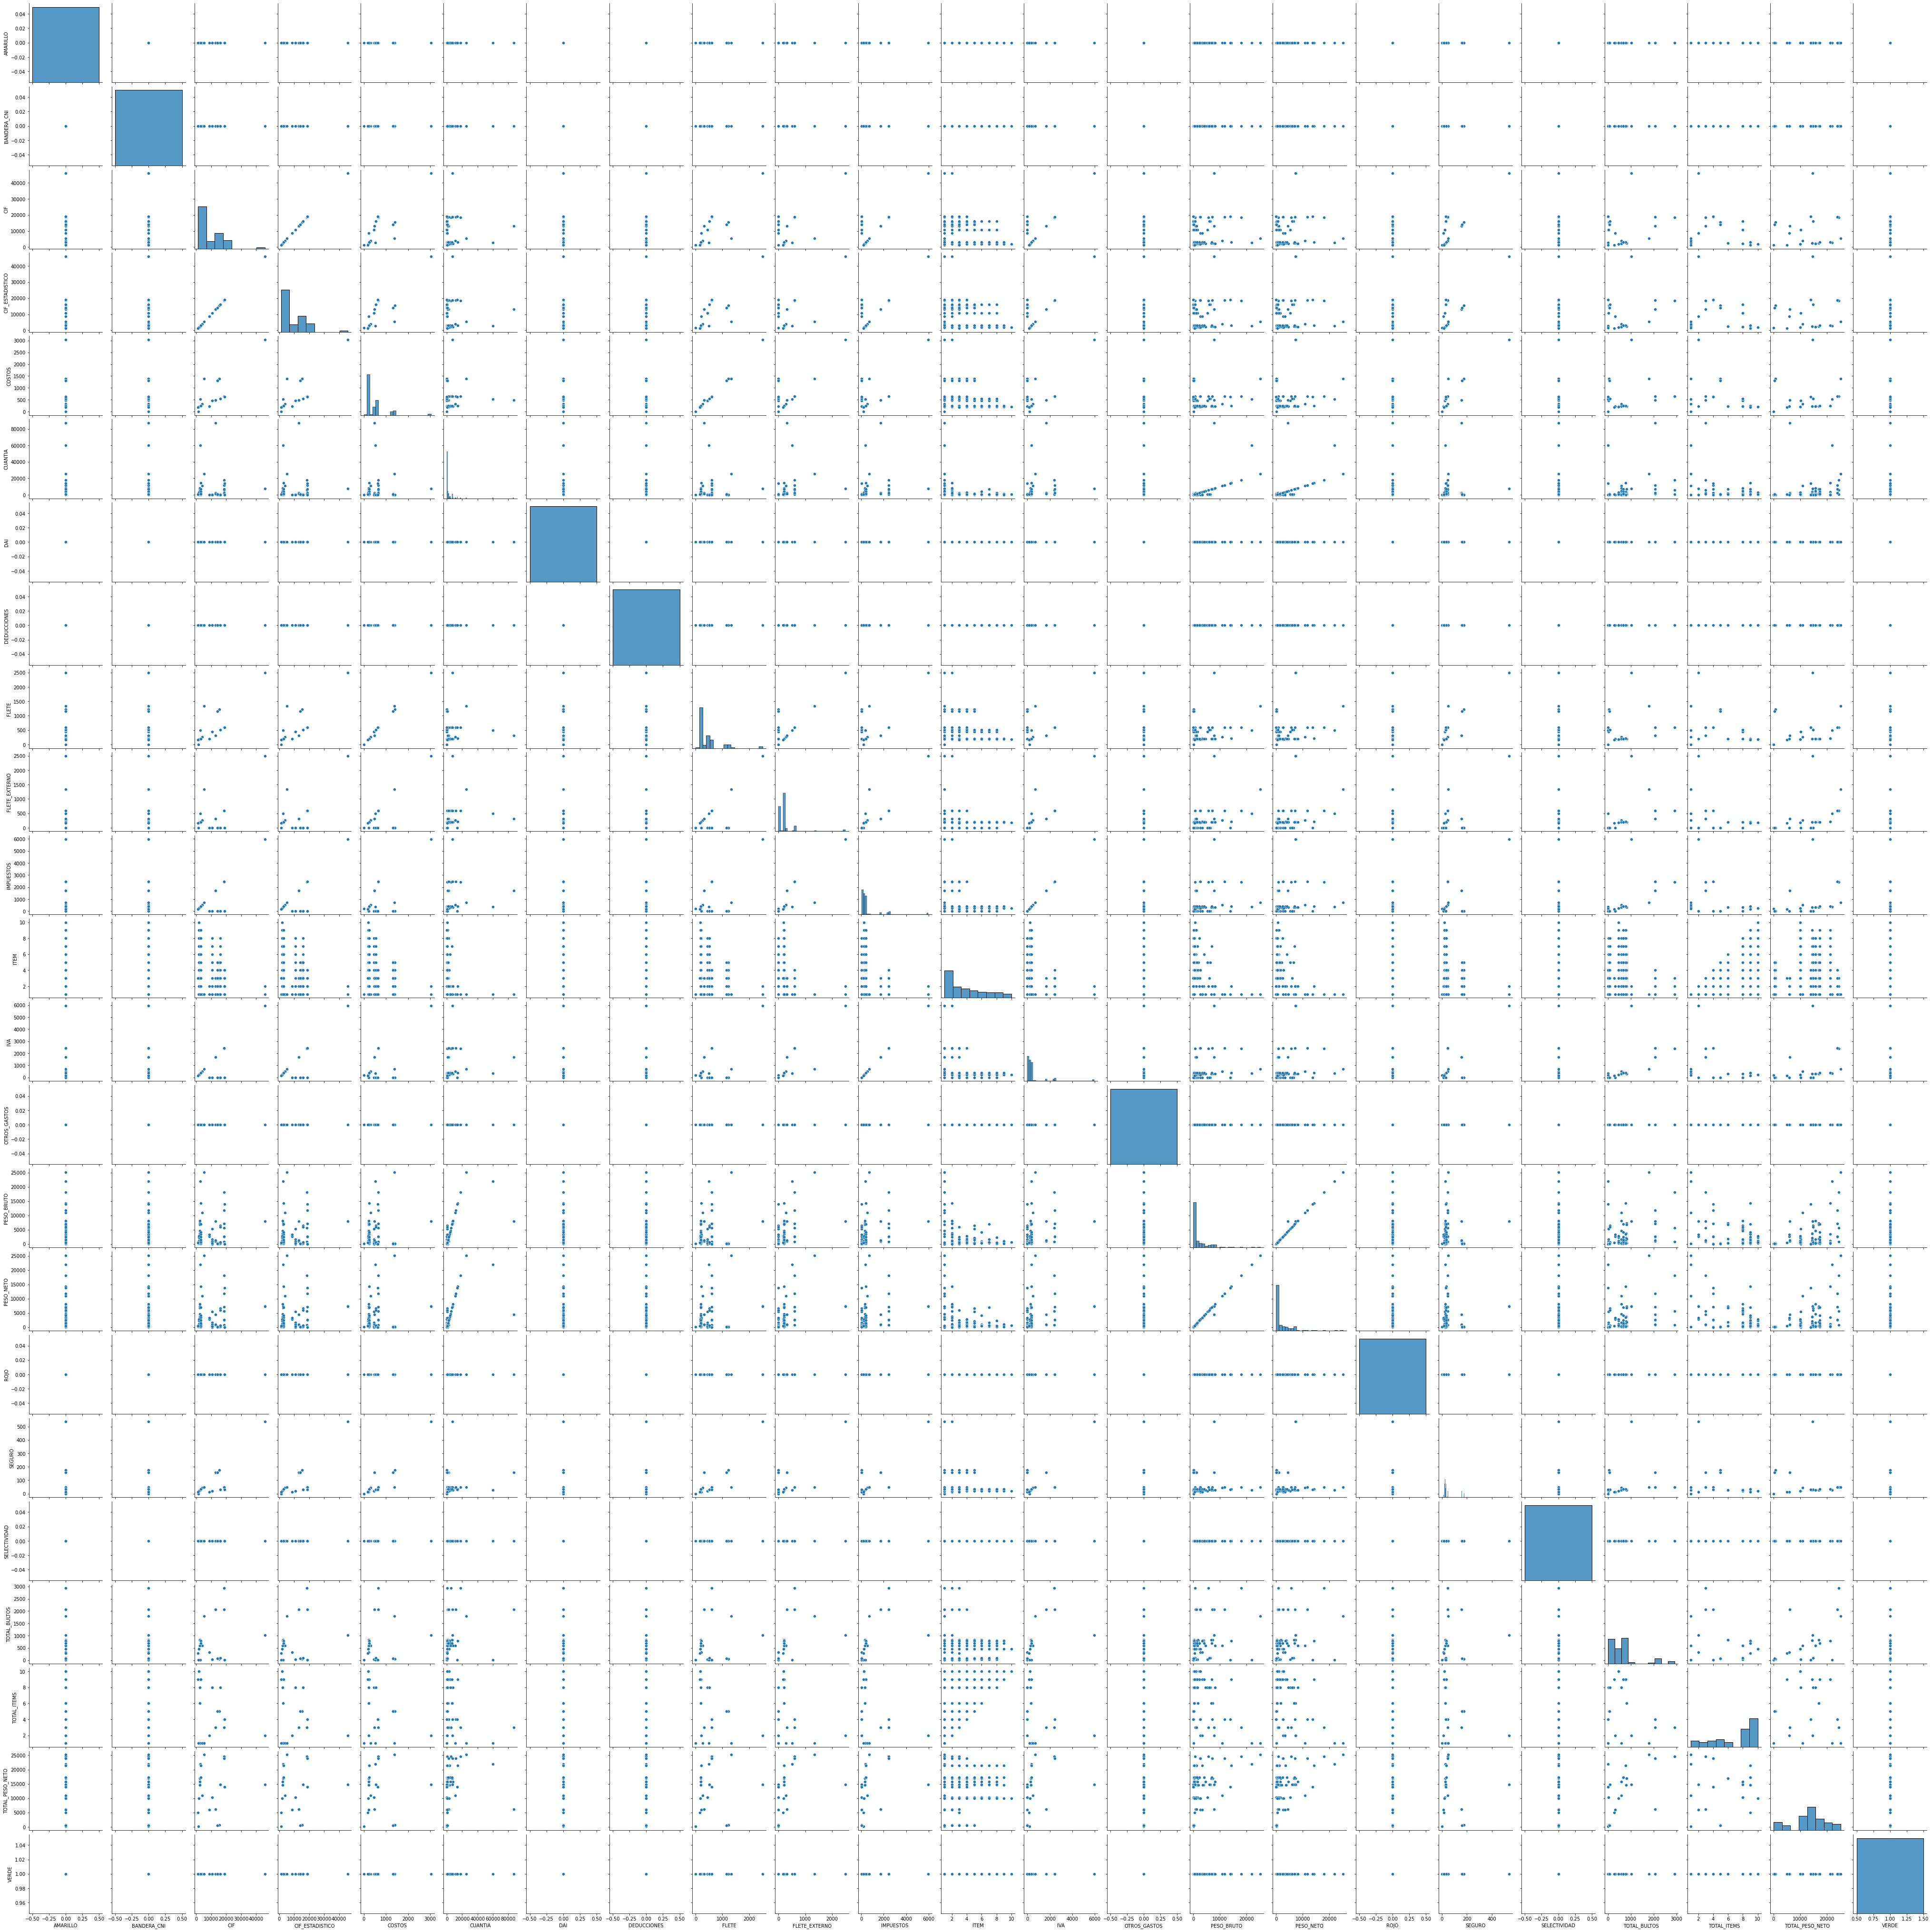

In [30]:
sb=sns.pairplot(df02.head(100))

In [33]:
df.dtypes

SISTEMA                     int64
LLAVE_MGR                  object
TIPO_DECLARACION           object
REGIMEN                     int64
REFERENCIA                 object
INCISO_EXT                  int64
CONTRIBUYENTE              object
DECLARANTE                 object
PESO_NETO                 float64
INCISO                      int64
DESC_COMERCIAL             object
ADUANA                     object
ANNO                      float64
FECHA_SELECTIVIDAD_IDX     object
CUANTIA                   float64
TIPO_OPERACION             object
PAIS_ORIGEN                object
FECHA_REGISTRO_IDX         object
PESO_BRUTO                float64
ITEM                      float64
TIPO_EMBALAJE              object
CAPITULO                  float64
ADUANA_INGRESO              int64
ALMACEN                    object
AMARILLO                   object
BANDERA_CNI               float64
CIF                       float64
CIF_ESTADISTICO           float64
COSTOS                    float64
DAI           

In [21]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import binom


In [43]:
capitulo=df03["CAPITULO"]
df03.groupby(['CAPITULO']).agg(['count'])

SISTEMA LLAVE_MGR EXPORTADOR CONTRIBUYENTE DECLARANTE INCISO  \
           count     count      count         count      count  count   
CAPITULO                                                                
1.0          601       601        339           601        601    601   
2.0         2675      2675       2673          2675       2675   2675   
3.0          442       442        392           442        442    442   
4.0         6172      6172       6169          6172       6172   6172   
5.0          167       167        154           167        167    167   
...          ...       ...        ...           ...        ...    ...   
94.0       17828     17828      14981         17828      17828  17828   
95.0       24094     24094       9768         24094      24094  24094   
96.0       20728     20728      13613         20728      20728  20728   
97.0         217       217        136           217        217    217   
98.0       66841     66841      66354         66841      66841  66841   

         INCISO_EXT ADUANA ADUANA_INGRESO PAIS_DESTINO  ...  \
              count  count          count        count  ...   
CAPITULO                                                ...   
1.0             601    601            601          601  ...   
2.0            2675   2675           2675         2675  ...   
3.0             442    442            442          442  ...   
4.0            6172   6172           6172         6172  ...   
5.0             167    167            167          167  ...   
...             ...    ...            ...          ...  ...   
94.0          17828  17828          17828        17828  ...   
95.0          24094  24094          24094        24094  ...   
96.0          20728  20728          20728        20728  ...   
97.0            217    217            217          217  ...   
98.0          66841  66841          66841        66841  ...   

         FECHA_SELECTIVIDAD_IDX TIPO_OPERACION FECHA_REGISTRO_IDX  \
                          count          count              count   
CAPITULO                                                            
1.0                         601            601                601   
2.0                        2675           2675               2675   
3.0                         442            442                442   
4.0                        6172           6172               6172   
5.0                         167            167                167   
...                         ...            ...                ...   
94.0                      17828          17828              17828   
95.0                      24094          24094              24094   
96.0                      20728          20728              20728   
97.0                        217            217                217   
98.0                      66841          66841              66841   

         TIPO_EMBALAJE ALMACEN ESTADO_DECLARACION LST_OPE MGR_PRONOSTICO  \
                 count   count              count   count          count   
CAPITULO                                                                   
1.0                601     601                601     601            601   
2.0               2675    2675               2675    2675           2675   
3.0                442     442                442     442            442   
4.0               6172    6172               6172    6172           6172   
5.0                167     167                167     167            167   
...                ...     ...                ...     ...            ...   
94.0             17801   17828              17828   17828          17828   
95.0             24070   24094              24094   24094          24094   
96.0             20685   20728              20728   20728          20728   
97.0               217     217                217     217            217   
98.0             66839   66841              66841   66841          66841   

         NUMERO_LIQ TIPO_CONTRIBUYENTE_NRC  
              count       

In [44]:
mean = capitulo.mean()
median =capitulo.median()
mode = capitulo.mode()
print(mean , median, mode)

55.595141820924106 61.0 0    39.0
dtype: float64


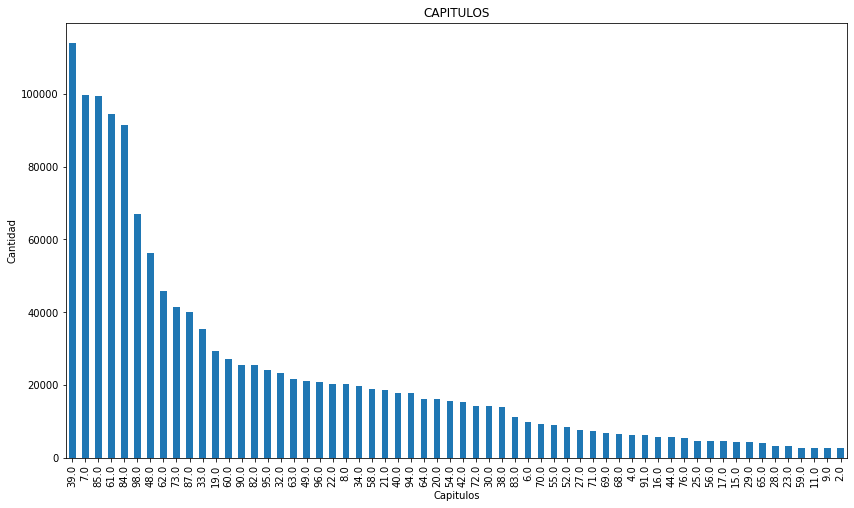

In [51]:
import matplotlib.pyplot as plt

df03.CAPITULO.value_counts().nlargest(60).plot(kind='bar', figsize=(14,8))
plt.title("CAPITULOS")
plt.ylabel('Cantidad')
plt.xlabel('Capitulos');

In [53]:
dcount =df["CAPITULO"].value_counts()
print(dcount)

39.0    113873
7.0      99775
85.0     99378
61.0     94551
84.0     91505
         ...  
26.0        50
78.0        48
81.0        46
75.0        32
50.0        25
Name: CAPITULO, Length: 97, dtype: int64


In [55]:
std_dev =df["CAPITULO"].std()
print(std_dev)
sv_CAPITULO=df.loc[:,"CAPITULO"].std()
print(sv_CAPITULO)

28.123466297383448
28.123466297383448


In [56]:
variance=df["CAPITULO"].var()
print(variance)
var_height=df.loc[:,"CAPITULO"].var()
print(var_height)

790.9293565800627
790.9293565800627


In [57]:
df.loc[:,"CAPITULO"].var()

790.9293565800627

In [58]:
df.skew()

SISTEMA              0.009094
REGIMEN             -0.613731
INCISO_EXT          19.795776
PESO_NETO          280.776794
INCISO              -0.220501
ANNO               -29.623123
CUANTIA            784.149588
PESO_BRUTO         289.233090
ITEM                 5.371704
CAPITULO            -0.219156
ADUANA_INGRESO       3.818492
BANDERA_CNI          5.403489
CIF                230.067492
CIF_ESTADISTICO    229.413249
COSTOS             117.788960
DAI                 31.584248
DEDUCCIONES        927.033120
FLETE               50.253312
FLETE_EXTERNO       67.025605
IMPUESTOS           32.887418
IVA                 25.668092
MGR_PRONOSTICO      15.820468
MODALIDAD_PAGO       4.009888
OTROS_GASTOS        28.316479
ROJO                 4.643844
SEGURO             307.595725
TOTAL_BULTOS       113.845868
TOTAL_ITEMS          4.017667
TOTAL_PESO_NETO    207.756074
VERDE               -3.751398
dtype: float64

In [59]:
kurtosis =df.kurt()
print(kurtosis)

sk_CAPITULO=df.loc[:,"CAPITULO"].kurt()
print(sk_CAPITULO)

SISTEMA                -1.999920
REGIMEN                 1.663611
INCISO_EXT            400.291603
PESO_NETO          137195.764383
INCISO                 -1.108183
ANNO                 1723.583213
CUANTIA            637716.710694
PESO_BRUTO         146172.864532
ITEM                   36.472475
CAPITULO               -1.106621
ADUANA_INGRESO         15.983754
BANDERA_CNI            27.197729
CIF                 69756.516439
CIF_ESTADISTICO     69485.406442
COSTOS              24088.700051
DAI                  4436.881678
DEDUCCIONES        957258.890172
FLETE                5792.092556
FLETE_EXTERNO       10042.395119
IMPUESTOS            2375.244872
IVA                  1784.675208
MGR_PRONOSTICO        248.287562
MODALIDAD_PAGO         14.478979
OTROS_GASTOS         2538.223035
ROJO                   19.565318
SEGURO             103151.814004
TOTAL_BULTOS        32665.912471
TOTAL_ITEMS            18.375999
TOTAL_PESO_NETO     45717.582265
VERDE                  12.073006
dtype: flo

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'PESO_BRUTO')

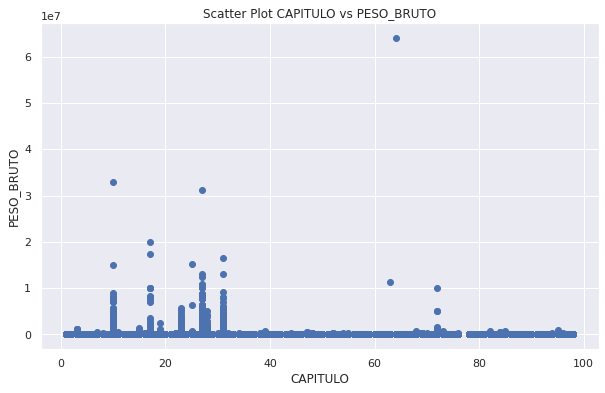

In [62]:
plt.scatter(df["CAPITULO"], df["PESO_BRUTO"])
plt.title("Scatter Plot CAPITULO vs PESO_BRUTO")
plt.xlabel("CAPITULO")
plt.ylabel("PESO_BRUTO")

<AxesSubplot:xlabel='CAPITULO', ylabel='PESO_BRUTO'>

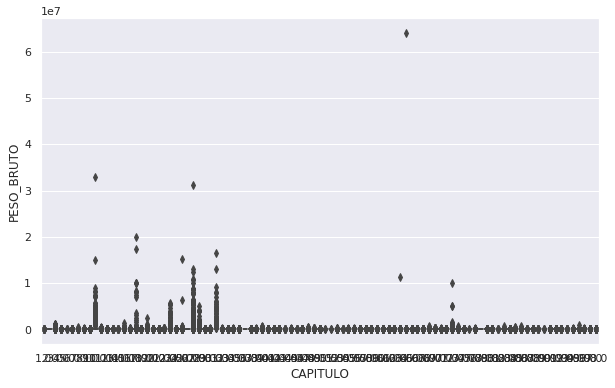

In [63]:
sns.boxplot(x="CAPITULO", y="PESO_BRUTO",data=df)

In [64]:
type(df.PESO_BRUTO[0])

numpy.float64

In [68]:
CAPITULO = df["CAPITULO"]
percentile = np.percentile(CAPITULO, 60,)
print(percentile)

nan


In [69]:
FLETE = df.FLETE.sort_values()
Q1 = np.percentile(FLETE, 25)
Q2 = np.percentile(FLETE, 50)
Q3 = np.percentile(FLETE, 75)

IQR = Q3 - Q1
IQR

742.36

In [70]:
df["FLETE"].describe()

count    1.411038e+06
mean     6.834762e+02
std      1.958663e+03
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+02
75%      7.423600e+02
max      4.303719e+05
Name: FLETE, dtype: float64

In [71]:
df.groupby('ANNO').groups.keys()

dict_keys([2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0])

In [82]:
anno = df.groupby('ANNO') #.groups.keys()
anno.get_group("2020.0")

KeyError: '2020.0'

In [80]:
anno

dict_keys([2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0])

In [83]:
double_grouping = df.groupby(["CAPITULO","PESO_BRUTO"])
double_grouping.first()

SISTEMA                LLAVE_MGR TIPO_DECLARACION  \
CAPITULO PESO_BRUTO                                                      
1.0      0.45              1   2020@03@002@2000086408               EX   
         0.65              1     2020@39@162@16202332               IM   
         2.00              1   2020@03@002@2000047820               EX   
         3.00              1   2020@03@002@2000015482               EX   
         4.00              1   2020@03@002@2000030027               EX   
...                      ...                      ...              ...   
98.0     5000.00           1  2020@05@003@15240520002              IMS   
         5028.70          18    350897@2020@01@4@4866               IM   
         5896.00           1       2020@01@167@167301               IM   
         6886.51          18    350676@2020@01@4@4828               IM   
         8500.00          18     324380@2020@09@1@285               EX   

                     REGIMEN   REFERENCIA  INCISO_EXT   CONTRIBUYENTE  \
CAPITULO PESO_BRUTO                                                     
1.0      0.45        1053000   2000086408           0  06142108921057   
         0.65        5400000     16202332           0  06140402081021   
         2.00        1053000   2000047820           0  06142108921057   
         3.00        1053000   2000015482           0  06140112921018   
         4.00        1053000   2000030027           0  06140112921018   
...                      ...          ...         ...             ...   
98.0     5000.00     4000002  15240520002           0  12152012571046   
         5028.70     4000008        04323           0  06142003711103   
         5896.00     4000008       167301           0  06143012570162   
         6886.51     4000008        04322           0  04201002861011   
         8500.00     1000000      1800012           0  07102311831022   

                    DECLARANTE  PESO_NETO    INCISO  ... PAIS_EXPORTACION  \
CAPITULO PESO_BRUTO                                  ...                    
1.0      0.45              002       0.35   1062000  ...               SV   
         0.65              162       0.53   1064900  ...               NL   
         2.00              002       1.00   1062000  ...               SV   
         3.00              002       2.00   1062000  ...               SV   
         4.00              002       3.00   1062000  ...               SV   
...                        ...        ...       ...  ...              ...   
98.0     5000.00           003        NaN  98010010  ...               US   
         5028.70           043    5028.70  98010020  ...               HN   
         5896.00           167    5896.00  98010020  ...               US   
         6886.51           043    6886.51  98010020  ...               GT   
         8500.00           180    8500.00  98010020  ...               SV   

                    PAIS_PROCEDENCIA  ROJO  SEGURO  SELECTIVIDAD  \
CAPITULO PESO_BRUTO                                                
1.0      0.45                     DE   1.0    0.00             3   
         0.65                     ES   0.0    0.00             0   
         2.00                     US   1.0    0.00             3   
         3.00                     US   1.0    0.00           3.0   
         4.00                     US   1.0    0.00             3   
...                              ...   ...     ...           ...   
98.0     5000.00                  US   0.0   32.64           0.0   
         5028.70                  HN   0.0  161.46           0.0   
         5896.00                  US   1.0    0.00             3   
         6886.51                  GT   0.0  152.36           0.0   
         8500.00                  CR   0.0    1.88           0.0   

                    TIPO_CONTRIBUYENTE_NRC TOTAL_BULTOS TOTAL_ITEMS  \
CAPITULO PESO_BRUTO                                                   
1.0      0.45                         None          3.0         3.0   
        

In [86]:
anno['PESO_BRUTO'].min()

ANNO
2014.0      39.00
2015.0      85.09
2016.0    1650.00
2017.0       0.35
2018.0       0.20
2019.0       0.02
2020.0       0.01
Name: PESO_BRUTO, dtype: float64

In [87]:
anno['PESO_BRUTO'].max()

ANNO
2014.0        2964.21
2015.0          85.09
2016.0        1650.00
2017.0        7547.75
2018.0        1792.00
2019.0    11000661.00
2020.0    64059000.00
Name: PESO_BRUTO, dtype: float64

In [12]:
categorics02 = ['SISTEMA', 'LLAVE_MGR', 'EXPORTADOR','CONTRIBUYENTE', 'DECLARANTE', 'INCISO', 'INCISO_EXT','ADUANA', 'ADUANA_INGRESO',
       'PAIS_DESTINO', 'PAIS_EXPORTACION', 'PAIS_PROCEDENCIA', 'PAIS_ORIGEN', 'REGIMEN', 
       'DESC_COMERCIAL',
       'MODALIDAD_PAGO',            
       'TIPO_DECLARACION', 'REFERENCIA',
       'ANNO', 'FECHA_SELECTIVIDAD_IDX',
       'TIPO_OPERACION', 'FECHA_REGISTRO_IDX',
       'TIPO_EMBALAJE', 'CAPITULO', 'ALMACEN',
       'ESTADO_DECLARACION', 
       'LST_OPE',
       'MGR_PRONOSTICO', 'NUMERO_LIQ']

In [14]:
dfnuevo=df[categorics02]

In [16]:
alllesscontr=['SISTEMA', 'LLAVE_MGR', 'TIPO_DECLARACION', 'REGIMEN', 'REFERENCIA',
       'INCISO_EXT', 'CONTRIBUYENTE', 'DECLARANTE', 'PESO_NETO', 'INCISO',
       'DESC_COMERCIAL', 'ADUANA', 'ANNO', 'FECHA_SELECTIVIDAD_IDX', 'CUANTIA',
       'TIPO_OPERACION', 'PAIS_ORIGEN', 'FECHA_REGISTRO_IDX', 'PESO_BRUTO',
       'ITEM', 'TIPO_EMBALAJE', 'CAPITULO', 'ADUANA_INGRESO', 'ALMACEN',
       'AMARILLO', 'BANDERA_CNI', 'CIF', 'CIF_ESTADISTICO', 'COSTOS', 'DAI',
       'DEDUCCIONES', 'ESTADO_DECLARACION', 'EXPORTADOR', 'FLETE',
       'FLETE_EXTERNO', 'FLETE_INTERNO', 'FOB', 'IMPUESTOS', 'IVA', 'LST_OPE',
       'MGR_PRONOSTICO', 'MODALIDAD_PAGO', 'NUMERO_LIQ', 'OTROS_GASTOS',
       'PAIS_DESTINO', 'PAIS_EXPORTACION', 'PAIS_PROCEDENCIA', 'ROJO',
       'SEGURO', 'SELECTIVIDAD', 'TOTAL_BULTOS',
       'TOTAL_ITEMS', 'TOTAL_PESO_NETO', 'VERDE']

In [18]:
dfnuevolesscon=df[alllesscontr]

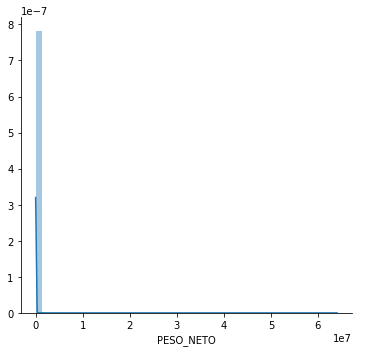

In [23]:
sns.FacetGrid(dfnuevolesscon,size=5).map(sns.distplot,"PESO_NETO").add_legend()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


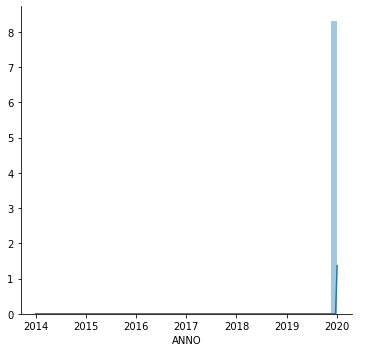

In [24]:
sns.FacetGrid(df,size=5).map(sns.distplot,"ANNO").add_legend()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


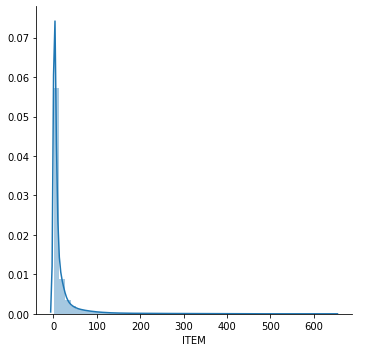

In [25]:
sns.FacetGrid(df,size=5).map(sns.distplot,"ITEM").add_legend()

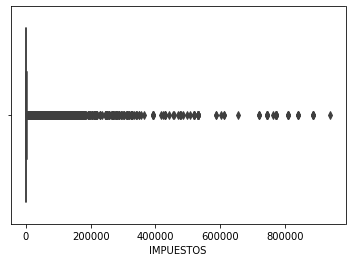

In [27]:
sns.boxplot(x="IMPUESTOS",data=df)
plt.show()

Text(0, 0.5, 'CUANTIA')

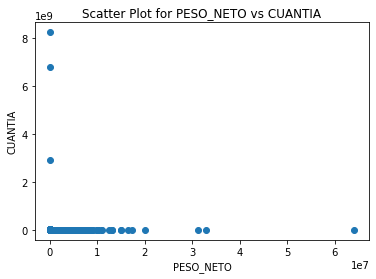

In [29]:
plt.scatter(df["PESO_NETO"], df["CUANTIA"])
plt.title("Scatter Plot for PESO_NETO vs CUANTIA")
plt.xlabel("PESO_NETO")
plt.ylabel("CUANTIA")

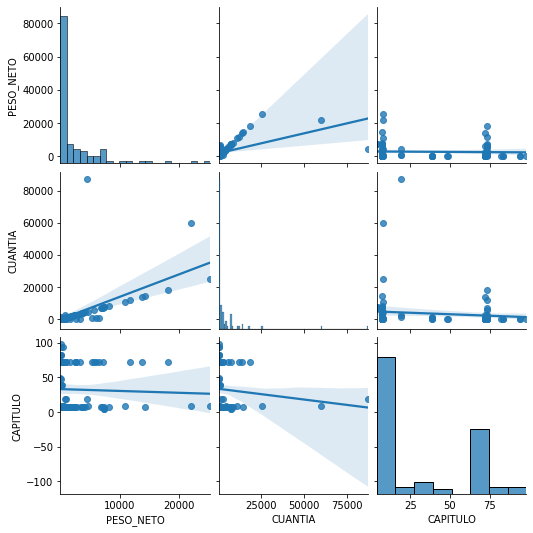

In [32]:
sns.pairplot(df.head(100), vars = ['PESO_NETO', 'CUANTIA','CAPITULO'],  kind="reg")
plt.show()

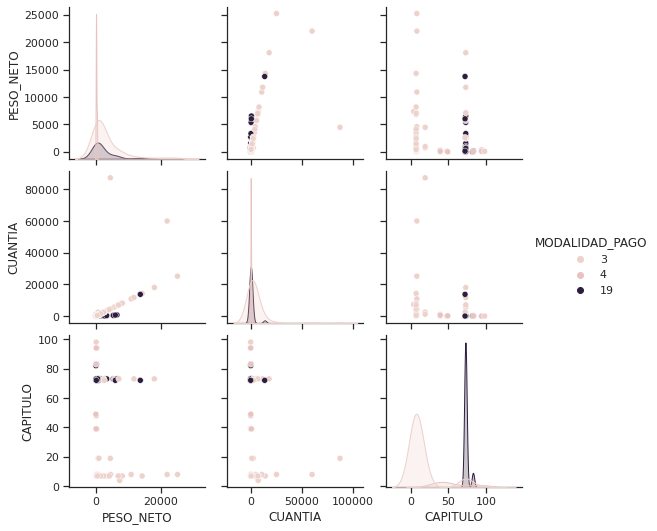

In [34]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df.head(100),vars = ['PESO_NETO', 'CUANTIA','CAPITULO'], hue="MODALIDAD_PAGO")
plt.show()

In [35]:
correlationdf = df.corr(method='pearson')
correlationdf

SISTEMA   REGIMEN  INCISO_EXT  PESO_NETO    INCISO  \
SISTEMA          1.000000 -0.207491   -0.052249   0.013148 -0.340983   
REGIMEN         -0.207491  1.000000    0.027351   0.000492  0.132599   
INCISO_EXT      -0.052249  0.027351    1.000000  -0.001451 -0.043590   
PESO_NETO        0.013148  0.000492   -0.001451   1.000000 -0.025153   
INCISO          -0.340983  0.132599   -0.043590  -0.025153  1.000000   
ANNO             0.002674 -0.005246    0.001111  -0.009661 -0.001392   
CUANTIA         -0.001528 -0.000443   -0.000155   0.000597  0.001021   
PESO_BRUTO       0.014919  0.002508   -0.001365   0.995149 -0.025844   
ITEM            -0.169212  0.045603   -0.005951  -0.012439  0.223047   
CAPITULO        -0.341130  0.132359   -0.043618  -0.025137  0.999977   
ADUANA_INGRESO   0.008855  0.052437   -0.021619  -0.007903  0.043425   
BANDERA_CNI      0.127938  0.052730   -0.006371   0.005500  0.017525   
CIF             -0.024958 -0.005759    0.005307   0.147439  0.007006   
CIF_ESTADISTICO -0.025796 -0.006165    0.005517   0.147320  0.007050   
COSTOS           0.115631  0.055843   -0.005991   0.055177  0.037210   
DAI             -0.014757  0.138909    0.021001   0.034344  0.054214   
DEDUCCIONES      0.001069  0.000569   -0.000116  -0.000003  0.001064   
FLETE            0.078375  0.031959   -0.002415   0.034953  0.045085   
FLETE_EXTERNO    0.099529  0.151553   -0.005232   0.037771  0.070793   
IMPUESTOS        0.113661  0.086703   -0.001493   0.175406  0.031498   
IVA              0.123504  0.135840    0.002019   0.304885  0.033518   
MGR_PRONOSTICO   0.042881  0.018045   -0.003610  -0.000687  0.036084   
MODALIDAD_PAGO  -0.052303 -0.280628   -0.009484  -0.004036  0.014057   
OTROS_GASTOS     0.033329  0.022906    0.034873   0.001095  0.011874   
ROJO            -0.053121  0.048231    0.002940  -0.003210  0.073134   
SEGURO           0.015012  0.010702   -0.000770   0.044929  0.006280   
TOTAL_BULTOS     0.018480 -0.055736   -0.009964   0.007592 -0.100667   
TOTAL_ITEMS     -0.201419  0.053819   -0.003908  -0.014619  0.179403   
TOTAL_PESO_NETO  0.007428  0.002303   -0.001049   0.342998 -0.013631   
VERDE            0.064137 -0.071895   -0.010322   0.003552 -0.048421   

                     ANNO   CUANTIA    PESO_BRUTO      ITEM  CAPITULO  ...  \
SISTEMA          0.002674 -0.001528  1.491946e-02 -0.169212 -0.341130  ...   
REGIMEN         -0.005246 -0.000443  2.507749e-03  0.045603  0.132359  ...   
INCISO_EXT       0.001111 -0.000155 -1.365446e-03 -0.005951 -0.043618  ...   
PESO_NETO       -0.009661  0.000597  9.951492e-01 -0.012439 -0.025137  ...   
INCISO          -0.001392  0.001021 -2.584434e-02  0.223047  0.999977  ...   
ANNO             1.000000  0.000100 -9.578624e-03 -0.005334 -0.001418  ...   
CUANTIA          0.000100  1.000000  6.071036e-04 -0.001058  0.001010  ...   
PESO_BRUTO      -0.009579  0.000607  1.000000e+00 -0.011987 -0.025826  ...   
ITEM            -0.005334 -0.001058 -1.198731e-02  1.000000  0.223524  ...   
CAPITULO        -0.001418  0.001010 -2.582621e-02  0.223524  1.000000  ...   
ADUANA_INGRESO   0.010103 -0.000779 -8.749414e-03  0.077239  0.043279  ...   
BANDERA_CNI      0.005190 -0.000352  5.960424e-03 -0.010030  0.017511  ...   
CIF             -0.003723  0.001799  1.470435e-01  0.028169  0.007028  ...   
CIF_ESTADISTICO -0.003773  0.001812  1.469845e-01  0.028731  0.007073  ...   
COSTOS          -0.000096  0.000160  5.537304e-02  0.051756  0.037250  ...   
DAI             -0.001869 -0.000523  3.447424e-02  0.122448  0.054301  ...   
DEDUCCIONES      0.000095 -0.000005 -9.041495e-07 -0.000676  0.001066  ...   
FLETE           -0.001506  0.000727  3.912165e-02  0.088962  0.045191  ...   
FLETE_EXTERNO   -0.001360 -0.000442  3.811326e-02  0.090399  0.070889  ...   
IMPUESTOS       -0.006226 -0.000174  1.744063e-01  0.108569  0.031482  ...   
IVA             -0.009708 -0.000058  3.025117e-01  0.093990  0.033442  ...   
MGR_PRONOSTICO   0.002642 -0.000138 -6.062947e-04  0.002488  0.035993

<AxesSubplot:>

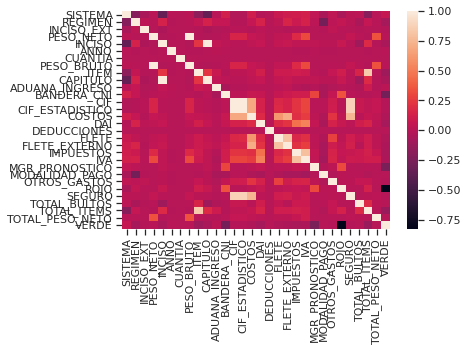

In [37]:
sns.heatmap(correlationdf,xticklabels=correlationdf.columns,
            yticklabels=correlationdf.columns)

In [38]:
correlationdf02 = df02.corr(method='pearson')
correlationdf02

BANDERA_CNI       CIF  CIF_ESTADISTICO    COSTOS   CUANTIA  \
BANDERA_CNI         1.000000  0.017637         0.017464  0.067024 -0.000352   
CIF                 0.017637  1.000000         0.999953  0.681236  0.001799   
CIF_ESTADISTICO     0.017464  0.999953         1.000000  0.680340  0.001812   
COSTOS              0.067024  0.681236         0.680340  1.000000  0.000160   
CUANTIA            -0.000352  0.001799         0.001812  0.000160  1.000000   
DAI                 0.060269  0.133458         0.133187  0.178370 -0.000523   
DEDUCCIONES        -0.000350  0.000249         0.000247 -0.003067 -0.000005   
FLETE               0.061909  0.169770         0.174451  0.614889  0.000727   
FLETE_EXTERNO       0.080991  0.138531         0.138135  0.706929 -0.000442   
IMPUESTOS           0.115983  0.216666         0.216252  0.206788 -0.000174   
ITEM               -0.010030  0.028169         0.028731  0.051756 -0.001058   
IVA                 0.110677  0.293868         0.293349  0.255564 -0.000058   
OTROS_GASTOS        0.045406  0.099409         0.102775  0.221894 -0.000098   
PESO_BRUTO          0.005960  0.147043         0.146985  0.055373  0.000607   
PESO_NETO           0.005500  0.147439         0.147320  0.055177  0.000597   
ROJO                0.339570  0.004997         0.005009  0.031149 -0.000426   
SEGURO              0.008184  0.878299         0.877404  0.744668  0.000575   
TOTAL_BULTOS       -0.007150  0.070803         0.071455  0.006998 -0.000491   
TOTAL_ITEMS        -0.012153  0.033669         0.034339  0.060730 -0.001263   
TOTAL_PESO_NETO     0.002308  0.057676         0.057622  0.030725  0.000167   
VERDE              -0.277714 -0.005677        -0.005704 -0.031295  0.000492   

                      DAI   DEDUCCIONES     FLETE  FLETE_EXTERNO  IMPUESTOS  \
BANDERA_CNI      0.060269 -3.496760e-04  0.061909       0.080991   0.115983   
CIF              0.133458  2.486819e-04  0.169770       0.138531   0.216666   
CIF_ESTADISTICO  0.133187  2.467495e-04  0.174451       0.138135   0.216252   
COSTOS           0.178370 -3.067113e-03  0.614889       0.706929   0.206788   
CUANTIA         -0.000523 -5.383455e-06  0.000727      -0.000442  -0.000174   
DAI              1.000000  3.607946e-03  0.174509       0.220715   0.453113   
DEDUCCIONES      0.003608  1.000000e+00  0.002851       0.003360   0.002108   
FLETE            0.174509  2.851347e-03  1.000000       0.806180   0.164526   
FLETE_EXTERNO    0.220715  3.360085e-03  0.806180       1.000000   0.209797   
IMPUESTOS        0.453113  2.107981e-03  0.164526       0.209797   1.000000   
ITEM             0.122448 -6.764616e-04  0.088962       0.090399   0.108569   
IVA              0.521007  1.289276e-03  0.207800       0.264947   0.792275   
OTROS_GASTOS     0.135548 -3.367547e-04  0.270015       0.099791   0.144055   
PESO_BRUTO       0.034474 -9.041495e-07  0.039122       0.038113   0.174406   
PESO_NETO        0.034344 -3.176097e-06  0.034953       0.037771   0.175406   
ROJO             0.070404 -4.024939e-04  0.026986       0.044200   0.054269   
SEGURO           0.021136  9.469636e-05  0.104309       0.124379   0.069938   
TOTAL_BULTOS     0.111769 -3.961432e-04  0.045766      -0.000696   0.085326   
TOTAL_ITEMS      0.145651 -8.034839e-04  0.104970       0.106400   0.129388   
TOTAL_PESO_NETO  0.016743 -3.092160e-05  0.023836       0.027282   0.065912   
VERDE           -0.069641  4.878662e-04 -0.028439      -0.046230  -0.062017   

                 ...       IVA  OTROS_GASTOS    PESO_BRUTO  PESO_NETO  \
BANDERA_CNI      ...  0.110677      0.045406  5.960424e-03   0.005500   
CIF              ...  0.293868      0.099409  1.470435e-01   0.147439   
CIF_ESTADISTICO  ...  0.293349      0.102775  1.469845e-01   0.147320   
COSTOS           ...  0.255564      0.221894  5.537304e-02   0.055177   
CUANTIA          ... -0.000058     -0.000098  6.071036e-04   0.000597   
DAI              ...  0.521007      0.135548  3.447424e-02   0.034344   
DEDUCCIONES      ...  0.0012

<AxesSubplot:>

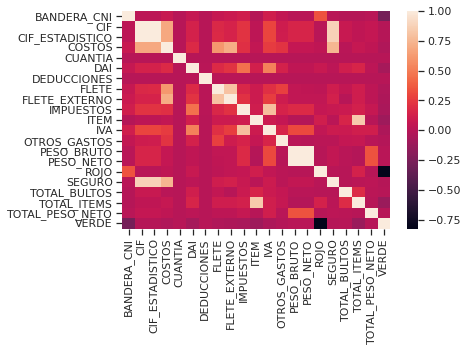

In [39]:
sns.heatmap(correlationdf02,xticklabels=correlationdf02.columns,
            yticklabels=correlationdf02.columns)

In [40]:
correlationdf03 = df03.corr(method='pearson')
correlationdf03

SISTEMA    INCISO  INCISO_EXT  ADUANA_INGRESO   REGIMEN  \
SISTEMA         1.000000 -0.340983   -0.052249        0.008855 -0.207491   
INCISO         -0.340983  1.000000   -0.043590        0.043425  0.132599   
INCISO_EXT     -0.052249 -0.043590    1.000000       -0.021619  0.027351   
ADUANA_INGRESO  0.008855  0.043425   -0.021619        1.000000  0.052437   
REGIMEN        -0.207491  0.132599    0.027351        0.052437  1.000000   
MODALIDAD_PAGO -0.052303  0.014057   -0.009484       -0.049033 -0.280628   
ANNO            0.002674 -0.001392    0.001111        0.010103 -0.005246   
CAPITULO       -0.341130  0.999977   -0.043618        0.043279  0.132359   
MGR_PRONOSTICO  0.042881  0.036084   -0.003610       -0.015087  0.018045   

                MODALIDAD_PAGO      ANNO  CAPITULO  MGR_PRONOSTICO  
SISTEMA              -0.052303  0.002674 -0.341130        0.042881  
INCISO                0.014057 -0.001392  0.999977        0.036084  
INCISO_EXT           -0.009484  0.001111 -0.043618       -0.003610  
ADUANA_INGRESO       -0.049033  0.010103  0.043279       -0.015087  
REGIMEN              -0.280628 -0.005246  0.132359        0.018045  
MODALIDAD_PAGO        1.000000 -0.018069  0.014300       -0.017205  
ANNO                 -0.018069  1.000000 -0.001418        0.002642  
CAPITULO              0.014300 -0.001418  1.000000        0.035993  
MGR_PRONOSTICO       -0.017205  0.002642  0.035993        1.000000

<AxesSubplot:>

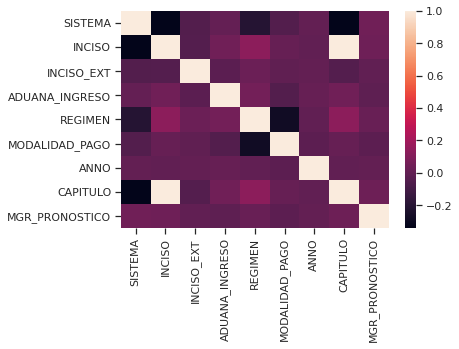

In [41]:
sns.heatmap(correlationdf03,xticklabels=correlationdf03.columns,
            yticklabels=correlationdf03.columns)

In [42]:
totaldf = df.isnull().sum().sort_values(ascending=False)
totaldf


TIPO_CONTRIBUYENTE_NRC    793862
EXPORTADOR                434246
PESO_NETO                 114223
DESC_COMERCIAL            100773
SELECTIVIDAD               92551
PAIS_PROCEDENCIA           32872
FLETE_INTERNO              16699
AMARILLO                    6649
FOB                         5145
TIPO_EMBALAJE               3688
NUMERO_LIQ                  3360
TOTAL_BULTOS                3030
CUANTIA                      650
PAIS_ORIGEN                  143
FECHA_REGISTRO_IDX           139
CAPITULO                     139
ITEM                         139
PESO_BRUTO                   139
FECHA_SELECTIVIDAD_IDX       139
ANNO                         139
TIPO_OPERACION               139
ADUANA                       136
ALMACEN                        4
ESTADO_DECLARACION             1
TOTAL_PESO_NETO                1
PAIS_EXPORTACION               1
DAI                            1
IVA                            0
LST_OPE                        0
MGR_PRONOSTICO                 0
TOTAL_ITEM

In [43]:
totaldf02 = df02.isnull().sum().sort_values(ascending=False)
totaldf02


PESO_NETO          114223
SELECTIVIDAD        92551
FLETE_INTERNO       16699
AMARILLO             6649
FOB                  5145
TOTAL_BULTOS         3030
CUANTIA               650
ITEM                  139
PESO_BRUTO            139
TOTAL_PESO_NETO         1
DAI                     1
OTROS_GASTOS            0
TOTAL_ITEMS             0
SEGURO                  0
ROJO                    0
IMPUESTOS               0
IVA                     0
BANDERA_CNI             0
FLETE_EXTERNO           0
FLETE                   0
DEDUCCIONES             0
COSTOS                  0
CIF_ESTADISTICO         0
CIF                     0
VERDE                   0
dtype: int64

In [44]:
totaldf03 = df03.isnull().sum().sort_values(ascending=False)
totaldf03


TIPO_CONTRIBUYENTE_NRC    793862
EXPORTADOR                434246
DESC_COMERCIAL            100773
PAIS_PROCEDENCIA           32872
TIPO_EMBALAJE               3688
NUMERO_LIQ                  3360
PAIS_ORIGEN                  143
TIPO_OPERACION               139
FECHA_REGISTRO_IDX           139
CAPITULO                     139
ANNO                         139
FECHA_SELECTIVIDAD_IDX       139
ADUANA                       136
ALMACEN                        4
PAIS_EXPORTACION               1
ESTADO_DECLARACION             1
LST_OPE                        0
MGR_PRONOSTICO                 0
SISTEMA                        0
REFERENCIA                     0
TIPO_DECLARACION               0
LLAVE_MGR                      0
REGIMEN                        0
PAIS_DESTINO                   0
ADUANA_INGRESO                 0
INCISO_EXT                     0
INCISO                         0
DECLARANTE                     0
CONTRIBUYENTE                  0
MODALIDAD_PAGO                 0
dtype: int

In [46]:
ordernulldf=(df.isnull().mean()*100).sort_values(ascending=False)
ordernulldf

TIPO_CONTRIBUYENTE_NRC    56.260852
EXPORTADOR                30.774933
PESO_NETO                  8.094963
DESC_COMERCIAL             7.141764
SELECTIVIDAD               6.559072
PAIS_PROCEDENCIA           2.329633
FLETE_INTERNO              1.183455
AMARILLO                   0.471213
FOB                        0.364625
TIPO_EMBALAJE              0.261368
NUMERO_LIQ                 0.238123
TOTAL_BULTOS               0.214736
CUANTIA                    0.046065
PAIS_ORIGEN                0.010134
FECHA_REGISTRO_IDX         0.009851
CAPITULO                   0.009851
ITEM                       0.009851
PESO_BRUTO                 0.009851
FECHA_SELECTIVIDAD_IDX     0.009851
ANNO                       0.009851
TIPO_OPERACION             0.009851
ADUANA                     0.009638
ALMACEN                    0.000283
ESTADO_DECLARACION         0.000071
TOTAL_PESO_NETO            0.000071
PAIS_EXPORTACION           0.000071
DAI                        0.000071
IVA                        0

In [47]:
ordernulldf02=(df02.isnull().mean()*100).sort_values(ascending=False)
ordernulldf02

PESO_NETO          8.094963
SELECTIVIDAD       6.559072
FLETE_INTERNO      1.183455
AMARILLO           0.471213
FOB                0.364625
TOTAL_BULTOS       0.214736
CUANTIA            0.046065
ITEM               0.009851
PESO_BRUTO         0.009851
TOTAL_PESO_NETO    0.000071
DAI                0.000071
OTROS_GASTOS       0.000000
TOTAL_ITEMS        0.000000
SEGURO             0.000000
ROJO               0.000000
IMPUESTOS          0.000000
IVA                0.000000
BANDERA_CNI        0.000000
FLETE_EXTERNO      0.000000
FLETE              0.000000
DEDUCCIONES        0.000000
COSTOS             0.000000
CIF_ESTADISTICO    0.000000
CIF                0.000000
VERDE              0.000000
dtype: float64

In [49]:
ordernulldf03=(df03.isnull().mean()*100).sort_values(ascending=False)
ordernulldf03

TIPO_CONTRIBUYENTE_NRC    56.260852
EXPORTADOR                30.774933
DESC_COMERCIAL             7.141764
PAIS_PROCEDENCIA           2.329633
TIPO_EMBALAJE              0.261368
NUMERO_LIQ                 0.238123
PAIS_ORIGEN                0.010134
TIPO_OPERACION             0.009851
FECHA_REGISTRO_IDX         0.009851
CAPITULO                   0.009851
ANNO                       0.009851
FECHA_SELECTIVIDAD_IDX     0.009851
ADUANA                     0.009638
ALMACEN                    0.000283
PAIS_EXPORTACION           0.000071
ESTADO_DECLARACION         0.000071
LST_OPE                    0.000000
MGR_PRONOSTICO             0.000000
SISTEMA                    0.000000
REFERENCIA                 0.000000
TIPO_DECLARACION           0.000000
LLAVE_MGR                  0.000000
REGIMEN                    0.000000
PAIS_DESTINO               0.000000
ADUANA_INGRESO             0.000000
INCISO_EXT                 0.000000
INCISO                     0.000000
DECLARANTE                 0

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

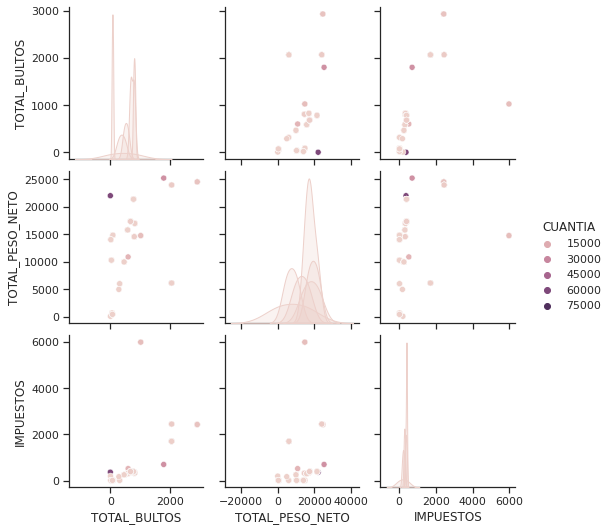

In [53]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df02.head(100),vars = [ 'TOTAL_BULTOS','TOTAL_PESO_NETO','IMPUESTOS'], hue="CUANTIA")
plt.show()


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

KeyboardInterrupt: 

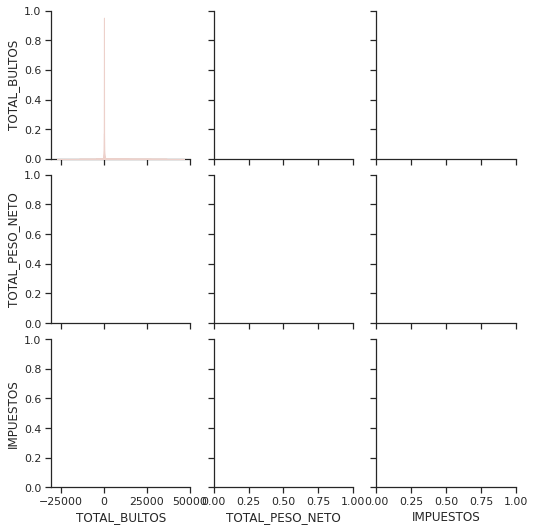

In [54]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df02.head(100000),vars = [ 'TOTAL_BULTOS','TOTAL_PESO_NETO','IMPUESTOS'], hue="CUANTIA")
plt.show()


In [55]:
df02.head()


AMARILLO  BANDERA_CNI       CIF  CIF_ESTADISTICO  COSTOS  CUANTIA  DAI  \
0      0.0          0.0  10741.22         10741.22  459.29     16.0  0.0   
1      0.0          0.0  10741.22         10741.22  459.29    116.0  0.0   
2      0.0          0.0  10741.22         10741.22  459.29    177.0  0.0   
3      0.0          0.0  10741.22         10741.22  459.29     64.0  0.0   
4      0.0          0.0  10741.22         10741.22  459.29      3.0  0.0   

   DEDUCCIONES   FLETE  FLETE_EXTERNO  ... OTROS_GASTOS PESO_BRUTO  PESO_NETO  \
0          0.0  438.14            0.0  ...          0.0     614.08     614.08   
1          0.0  438.14            0.0  ...          0.0     909.46     909.46   
2          0.0  438.14            0.0  ...          0.0    1563.87    1563.87   
3          0.0  438.14            0.0  ...          0.0     647.79     647.79   
4          0.0  438.14            0.0  ...          0.0       0.09       0.09   

   ROJO  SEGURO  SELECTIVIDAD  TOTAL_BULTOS  TOTAL_ITEMS  TOTAL_PESO_NETO  \
0   0.0   21.15           0.0          37.0          8.0         10293.77   
1   0.0   21.15           0.0          37.0          8.0         10293.77   
2   0.0   21.15           0.0          37.0          8.0         10293.77   
3   0.0   21.15           0.0          37.0          8.0         10293.77   
4   0.0   21.15           0.0          37.0          8.0         10293.77   

   VERDE  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  

[5 rows x 25 columns]

In [56]:
df.groupby('TOTAL_BULTOS').groups.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 

In [57]:
df.groupby('SEGURO').groups.keys()

dict_keys([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67

In [58]:
df.groupby('VERDE').groups.keys()

dict_keys([0.0, 1.0])

In [60]:
df.groupby('TOTAL_ITEMS').groups.keys()

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0

In [63]:
df02['VERDE'] = df02['VERDE'].map({0.0:1, 1.0:2,"NaN":0})
TcorrelationVERDE = df02.corr(method='pearson')
TcorrelationVERDE


<ipython-input-63-a495ae7ba0e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df02['VERDE'] = df02['VERDE'].map({0.0:1, 1.0:2,"NaN":0})


BANDERA_CNI       CIF  CIF_ESTADISTICO    COSTOS   CUANTIA  \
BANDERA_CNI         1.000000  0.017637         0.017464  0.067024 -0.000352   
CIF                 0.017637  1.000000         0.999953  0.681236  0.001799   
CIF_ESTADISTICO     0.017464  0.999953         1.000000  0.680340  0.001812   
COSTOS              0.067024  0.681236         0.680340  1.000000  0.000160   
CUANTIA            -0.000352  0.001799         0.001812  0.000160  1.000000   
DAI                 0.060269  0.133458         0.133187  0.178370 -0.000523   
DEDUCCIONES        -0.000350  0.000249         0.000247 -0.003067 -0.000005   
FLETE               0.061909  0.169770         0.174451  0.614889  0.000727   
FLETE_EXTERNO       0.080991  0.138531         0.138135  0.706929 -0.000442   
IMPUESTOS           0.115983  0.216666         0.216252  0.206788 -0.000174   
ITEM               -0.010030  0.028169         0.028731  0.051756 -0.001058   
IVA                 0.110677  0.293868         0.293349  0.255564 -0.000058   
OTROS_GASTOS        0.045406  0.099409         0.102775  0.221894 -0.000098   
PESO_BRUTO          0.005960  0.147043         0.146985  0.055373  0.000607   
PESO_NETO           0.005500  0.147439         0.147320  0.055177  0.000597   
ROJO                0.339570  0.004997         0.005009  0.031149 -0.000426   
SEGURO              0.008184  0.878299         0.877404  0.744668  0.000575   
TOTAL_BULTOS       -0.007150  0.070803         0.071455  0.006998 -0.000491   
TOTAL_ITEMS        -0.012153  0.033669         0.034339  0.060730 -0.001263   
TOTAL_PESO_NETO     0.002308  0.057676         0.057622  0.030725  0.000167   
VERDE                    NaN       NaN              NaN       NaN       NaN   

                      DAI   DEDUCCIONES     FLETE  FLETE_EXTERNO  IMPUESTOS  \
BANDERA_CNI      0.060269 -3.496760e-04  0.061909       0.080991   0.115983   
CIF              0.133458  2.486819e-04  0.169770       0.138531   0.216666   
CIF_ESTADISTICO  0.133187  2.467495e-04  0.174451       0.138135   0.216252   
COSTOS           0.178370 -3.067113e-03  0.614889       0.706929   0.206788   
CUANTIA         -0.000523 -5.383455e-06  0.000727      -0.000442  -0.000174   
DAI              1.000000  3.607946e-03  0.174509       0.220715   0.453113   
DEDUCCIONES      0.003608  1.000000e+00  0.002851       0.003360   0.002108   
FLETE            0.174509  2.851347e-03  1.000000       0.806180   0.164526   
FLETE_EXTERNO    0.220715  3.360085e-03  0.806180       1.000000   0.209797   
IMPUESTOS        0.453113  2.107981e-03  0.164526       0.209797   1.000000   
ITEM             0.122448 -6.764616e-04  0.088962       0.090399   0.108569   
IVA              0.521007  1.289276e-03  0.207800       0.264947   0.792275   
OTROS_GASTOS     0.135548 -3.367547e-04  0.270015       0.099791   0.144055   
PESO_BRUTO       0.034474 -9.041495e-07  0.039122       0.038113   0.174406   
PESO_NETO        0.034344 -3.176097e-06  0.034953       0.037771   0.175406   
ROJO             0.070404 -4.024939e-04  0.026986       0.044200   0.054269   
SEGURO           0.021136  9.469636e-05  0.104309       0.124379   0.069938   
TOTAL_BULTOS     0.111769 -3.961432e-04  0.045766      -0.000696   0.085326   
TOTAL_ITEMS      0.145651 -8.034839e-04  0.104970       0.106400   0.129388   
TOTAL_PESO_NETO  0.016743 -3.092160e-05  0.023836       0.027282   0.065912   
VERDE                 NaN           NaN       NaN            NaN        NaN   

                 ...       IVA  OTROS_GASTOS    PESO_BRUTO  PESO_NETO  \
BANDERA_CNI      ...  0.110677      0.045406  5.960424e-03   0.005500   
CIF              ...  0.293868      0.099409  1.470435e-01   0.147439   
CIF_ESTADISTICO  ...  0.293349      0.102775  1.469845e-01   0.147320   
COSTOS           ...  0.255564      0.221894  5.537304e-02   0.055177   
CUANTIA          ... -0.000058     -0.000098  6.071036e-04   0.000597   
DAI              ...  0.521007      0.135548  3.447424e-02   0.034344   
DEDUCCIONES      ...  0.0012

<AxesSubplot:>

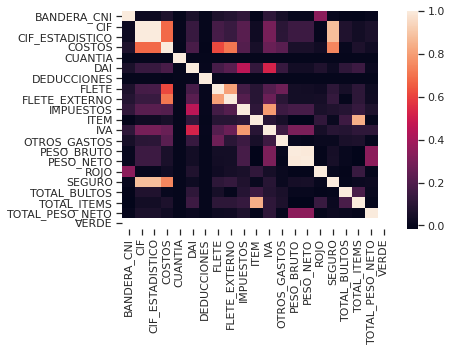

In [66]:
sns.heatmap(TcorrelationVERDE,xticklabels=TcorrelationVERDE.columns,
            yticklabels=TcorrelationVERDE.columns)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


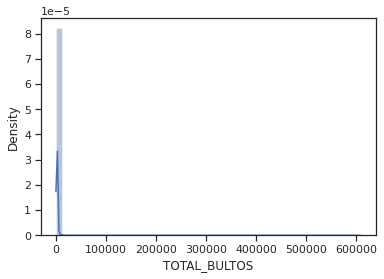

In [67]:
sns.distplot(df['TOTAL_BULTOS'])
plt.show()

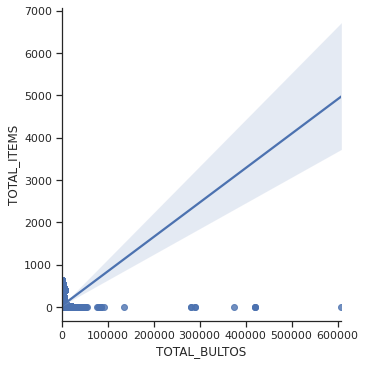

In [68]:
sns.lmplot(x = 'TOTAL_BULTOS', y = 'TOTAL_ITEMS', data = df)

<AxesSubplot:>

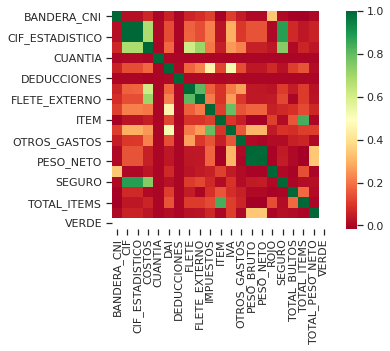

In [69]:
sns.heatmap(df02.corr(), square=True, cmap='RdYlGn')

In [71]:
#df.groupby('ANNO').groups.keys()
dcount =df["ANNO"].value_counts()
dcount

2020.0    1407252
2019.0       3602
2018.0         25
2014.0         13
2017.0          5
2015.0          1
2016.0          1
Name: ANNO, dtype: int64

In [73]:
dft=df[df['ANNO'] == 2020.0]

In [74]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407252 entries, 8 to 1411037
Data columns (total 55 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SISTEMA                 1407252 non-null  int64  
 1   LLAVE_MGR               1407252 non-null  object 
 2   TIPO_DECLARACION        1407252 non-null  object 
 3   REGIMEN                 1407252 non-null  int64  
 4   REFERENCIA              1407252 non-null  object 
 5   INCISO_EXT              1407252 non-null  int64  
 6   CONTRIBUYENTE           1407252 non-null  object 
 7   DECLARANTE              1407252 non-null  object 
 8   PESO_NETO               1293113 non-null  float64
 9   INCISO                  1407252 non-null  int64  
 10  DESC_COMERCIAL          1307117 non-null  object 
 11  ADUANA                  1407252 non-null  object 
 12  ANNO                    1407252 non-null  float64
 13  FECHA_SELECTIVIDAD_IDX  1407252 non-null  object 
 14  CU

In [76]:
dft.shape
#(1411038, 55)


(1407252, 55)

In [80]:
#dfte=dft[dft[EXPORTADOR]!="NaN"]
#null_cols = dft.columns[dft.isnull().all()]
#dfte=dft.drop(null_cols, axis = 1, inplace = True)
dfte = dft[dft.columns[~dft.isnull().all()]]


In [81]:
dfte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407252 entries, 8 to 1411037
Data columns (total 55 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SISTEMA                 1407252 non-null  int64  
 1   LLAVE_MGR               1407252 non-null  object 
 2   TIPO_DECLARACION        1407252 non-null  object 
 3   REGIMEN                 1407252 non-null  int64  
 4   REFERENCIA              1407252 non-null  object 
 5   INCISO_EXT              1407252 non-null  int64  
 6   CONTRIBUYENTE           1407252 non-null  object 
 7   DECLARANTE              1407252 non-null  object 
 8   PESO_NETO               1293113 non-null  float64
 9   INCISO                  1407252 non-null  int64  
 10  DESC_COMERCIAL          1307117 non-null  object 
 11  ADUANA                  1407252 non-null  object 
 12  ANNO                    1407252 non-null  float64
 13  FECHA_SELECTIVIDAD_IDX  1407252 non-null  object 
 14  CU

In [82]:
dfte.shape

(1407252, 55)

In [85]:
#dfte=dft.dropna(axis=1,how='all')
df1 = dft.dropna(thresh=2)

In [86]:
df1.shape

(1407252, 55)

In [87]:
orderdft=(dft.isnull().mean()*100).sort_values(ascending=False)
orderdft

TIPO_CONTRIBUYENTE_NRC    56.268955
EXPORTADOR                30.797895
PESO_NETO                  8.110772
DESC_COMERCIAL             7.115641
SELECTIVIDAD               6.573663
PAIS_PROCEDENCIA           2.335900
FLETE_INTERNO              1.186213
AMARILLO                   0.471913
FOB                        0.364327
TIPO_EMBALAJE              0.251909
NUMERO_LIQ                 0.238763
TOTAL_BULTOS               0.214461
CUANTIA                    0.036312
PAIS_ORIGEN                0.000284
ALMACEN                    0.000284
DAI                        0.000071
ESTADO_DECLARACION         0.000071
PAIS_EXPORTACION           0.000071
TOTAL_PESO_NETO            0.000071
OTROS_GASTOS               0.000000
MODALIDAD_PAGO             0.000000
MGR_PRONOSTICO             0.000000
PAIS_DESTINO               0.000000
LST_OPE                    0.000000
IVA                        0.000000
ROJO                       0.000000
IMPUESTOS                  0.000000
SEGURO                     0

In [94]:
dcount =df["FOB"].value_counts()
dcount

0.0         224855
0.0          22720
1.0           2241
J              684
34385.55       647
             ...  
2223.2           1
908.5            1
138.96           1
75537.19         1
8928.37          1
Name: FOB, Length: 159749, dtype: int64

In [95]:
dftf=dft[dft['FOB'] != "0.0"]

In [96]:
dftf.shape
#(1411038, 55)
#(1407252, 55)


(1182418, 55)

In [97]:
orderdftf=(dftf.isnull().mean()*100).sort_values(ascending=False)
orderdftf

TIPO_CONTRIBUYENTE_NRC    66.968365
EXPORTADOR                36.654043
PESO_NETO                  9.653016
DESC_COMERCIAL             3.781150
PAIS_PROCEDENCIA           2.780066
SELECTIVIDAD               2.304261
FOB                        0.433603
AMARILLO                   0.407047
FLETE_INTERNO              0.373557
NUMERO_LIQ                 0.282726
TOTAL_BULTOS               0.255240
TIPO_EMBALAJE              0.240355
CUANTIA                    0.042878
ALMACEN                    0.000338
PAIS_ORIGEN                0.000169
DAI                        0.000085
ESTADO_DECLARACION         0.000085
PAIS_EXPORTACION           0.000085
TOTAL_PESO_NETO            0.000085
OTROS_GASTOS               0.000000
MODALIDAD_PAGO             0.000000
MGR_PRONOSTICO             0.000000
PAIS_DESTINO               0.000000
LST_OPE                    0.000000
IVA                        0.000000
ROJO                       0.000000
IMPUESTOS                  0.000000
SEGURO                     0

In [101]:
dcoundftf =dftf["TIPO_CONTRIBUYENTE_NRC"].value_counts()
dcoundftf

J           259597
N           103766
0.0           2408
0             1435
0.0            307
             ...  
11316.0          1
10798.42         1
75392.92         1
2788.97          1
11364.0          1
Name: TIPO_CONTRIBUYENTE_NRC, Length: 6599, dtype: int64

In [103]:
correlationdftf = dftf.corr(method='pearson')
correlationdftf

SISTEMA   REGIMEN  INCISO_EXT  PESO_NETO    INCISO  ANNO  \
SISTEMA          1.000000 -0.041904   -0.050528   0.012899 -0.368975   NaN   
REGIMEN         -0.041904  1.000000    0.029169   0.005850  0.050857   NaN   
INCISO_EXT      -0.050528  0.029169    1.000000  -0.001469 -0.046873   NaN   
PESO_NETO        0.012899  0.005850   -0.001469   1.000000 -0.023562   NaN   
INCISO          -0.368975  0.050857   -0.046873  -0.023562  1.000000   NaN   
ANNO                  NaN       NaN         NaN        NaN       NaN   NaN   
CUANTIA         -0.001707 -0.000094   -0.000155   0.000531  0.001238   NaN   
PESO_BRUTO       0.014351  0.008072   -0.001356   0.994399 -0.023931   NaN   
ITEM            -0.177137  0.020284   -0.007647  -0.011541  0.215791   NaN   
CAPITULO        -0.369095  0.050515   -0.046898  -0.023548  0.999975   NaN   
ADUANA_INGRESO   0.048294  0.025705   -0.022661  -0.006995  0.045074   NaN   
BANDERA_CNI      0.142873  0.040671   -0.006887   0.005718  0.012869   NaN   
CIF             -0.030073 -0.021599    0.005914   0.125676  0.006183   NaN   
CIF_ESTADISTICO -0.030903 -0.022247    0.006123   0.125566  0.006211   NaN   
COSTOS           0.110573  0.083678   -0.005651   0.054109  0.041552   NaN   
DAI             -0.008610  0.135260    0.022099   0.039045  0.042064   NaN   
DEDUCCIONES      0.000701  0.000342   -0.000095   0.000020  0.000958   NaN   
FLETE            0.073507  0.051005   -0.002568   0.037401  0.051723   NaN   
FLETE_EXTERNO    0.116374  0.148424   -0.006068   0.042929  0.061337   NaN   
IMPUESTOS        0.117259  0.063371   -0.001241   0.173614  0.013704   NaN   
IVA              0.131940  0.122109    0.002649   0.313870  0.014027   NaN   
MGR_PRONOSTICO   0.048939  0.013908   -0.003942  -0.000446  0.034227   NaN   
MODALIDAD_PAGO  -0.067143 -0.317460   -0.010740  -0.004012  0.029411   NaN   
OTROS_GASTOS     0.032920  0.006612    0.037507   0.001047  0.007584   NaN   
ROJO            -0.043808  0.026608    0.001818  -0.003113  0.072160   NaN   
SEGURO           0.012420  0.016064   -0.000388   0.040339  0.005608   NaN   
TOTAL_BULTOS     0.001861 -0.045788   -0.014142   0.001031 -0.130236   NaN   
TOTAL_ITEMS     -0.211785  0.023779   -0.005943  -0.013558  0.169874   NaN   
TOTAL_PESO_NETO  0.006755  0.003917   -0.001019   0.320480 -0.012399   NaN   
VERDE            0.049467 -0.053280   -0.009060   0.003331 -0.043738   NaN   

                  CUANTIA  PESO_BRUTO      ITEM  CAPITULO  ...       IVA  \
SISTEMA         -0.001707    0.014351 -0.177137 -0.369095  ...  0.131940   
REGIMEN         -0.000094    0.008072  0.020284  0.050515  ...  0.122109   
INCISO_EXT      -0.000155   -0.001356 -0.007647 -0.046898  ...  0.002649   
PESO_NETO        0.000531    0.994399 -0.011541 -0.023548  ...  0.313870   
INCISO           0.001238   -0.023931  0.215791  0.999975  ...  0.014027   
ANNO                  NaN         NaN       NaN       NaN  ...       NaN   
CUANTIA          1.000000    0.000541 -0.000989  0.001227  ... -0.000020   
PESO_BRUTO       0.000541    1.000000 -0.010897 -0.023915  ...  0.311025   
ITEM            -0.000989   -0.010897  1.000000  0.216300  ...  0.088527   
CAPITULO         0.001227   -0.023915  0.216300  1.000000  ...  0.013923   
ADUANA_INGRESO  -0.000801   -0.007769  0.083709  0.044900  ... -0.030330   
BANDERA_CNI     -0.000338    0.006090 -0.011572  0.012878  ...  0.114259   
CIF              0.001775    0.125525  0.026099  0.006199  ...  0.275468   
CIF_ESTADISTICO  0.001788    0.125490  0.026654  0.006229  ...  0.274931   
COSTOS           0.000119    0.054220  0.055519  0.041601  ...  0.247818   
DAI             -0.000486    0.039183  0.121980  0.042139  ...  0.528095   
DEDUCCIONES     -0.000004    0.000022 -0.000610  0.000958  ... -0.000374   
FLETE            0.000719    0.041846  0.094083  0.051833  ...  0.205459   
FLETE_EXTERNO   -0.000395    0.043204  0.089335  0.061437  ...  0.258318   
IMPUESTOS       -0.000130    0.172507  0.102430  0.013663  ...  0.775352   
IVA

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import keras

ImportError: cannot import name 'LazyLoader' from 'keras.utils.generic_utils' (/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py)

In [14]:
print('Numpy version      :' , numpy.__version__)
print('Pandas version     :' ,pandas.__version__)
print('matplotlib version :' ,matplotlib.__version__)
print('seaborn version    :' , seaborn.__version__)
print('tensorflow version :' , tensorflow.__version__)
#print('keras version      :' , keras.__version__)

Numpy version      : 1.19.5
Pandas version     : 1.2.4
matplotlib version : 3.4.2
seaborn version    : 0.11.1
tensorflow version : 2.5.0


In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
import seaborn as sns
%matplotlib inline

####### Deep learning libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from ann_visualizer.visualize import ann_viz
# 
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)
#
from IPython.display import display, Math, Latex


ImportError: cannot import name 'LazyLoader' from 'keras.utils.generic_utils' (/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py)